## 1) importation des données

In [1]:
#encoding: utf-8
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
import time
import os
import hdbscan
%pylab inline
sns.set()

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
path = 'clustering-benchmark-master/src/main/resources/datasets/artificial/'
data_brutes = arff.loadarff(open(path+"2d-3c-no123.arff",'r'))[0] #spherical_4_3.arff
data = np.array([(x[0],x[1]) for x in data_brutes])

### Affichage

In [2]:
X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
plt.scatter(X,Y)

NameError: name 'data_brutes' is not defined

In [4]:
os.chdir("clustering-benchmark-master/src/main/resources/datasets/artificial")
os.getcwd()
Files = os.listdir()
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        #data_brutes = arff.loadarff(open(f,'r'))[0]    
        #X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        #plt.scatter(X,Y)
        #plt.show()

2d-10c.arff
2d-20c-no0.arff
2d-3c-no123.arff
2d-4c-no4.arff
2d-4c-no9.arff
2d-4c.arff
2dnormals.arff
2sp2glob.arff
3-spiral.arff
aggregation.arff
aml28.arff
atom.arff
banana.arff
birch-rg1.arff
birch-rg2.arff
birch-rg3.arff
blobs.arff
cassini.arff
chainlink.arff
circle.arff
cluto-t4-8k.arff
cluto-t5-8k.arff
cluto-t7-10k.arff
cluto-t8-8k.arff
complex8.arff
complex9.arff
compound.arff
cuboids.arff
cure-t0-2000n-2D.arff
cure-t1-2000n-2D.arff
cure-t2-4k.arff
curves1.arff
curves2.arff
D31.arff
dartboard1.arff
dartboard2.arff
dense-disk-3000.arff
dense-disk-5000.arff
diamond9.arff
disk-1000n.arff
disk-3000n.arff
disk-4000n.arff
disk-4500n.arff
disk-4600n.arff
disk-5000n.arff
disk-6000n.arff
donut1.arff
donut2.arff
donut3.arff
donutcurves.arff
dpb.arff
dpc.arff
ds2c2sc13.arff
ds3c3sc6.arff
ds4c2sc8.arff
elliptical_10_2.arff
elly-2d10c13s.arff
engytime.arff
flame.arff
fourty.arff
gaussians1.arff
golfball.arff
hepta.arff
hypercube.arff
impossible.arff
insect.arff
jain.arff
long1.arff
long2.arff

## 2) KMeans

In [5]:
KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)

KMeans(n_clusters=3, random_state=0)

In [6]:
for k in range(2,11):
    tps1 = time.clock()
    i = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data).n_iter_    
    tps2 = time.clock()
    print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

k = 2 , n_iter = 3 , runtime =  29.63 ms
k = 3 , n_iter = 5 , runtime =  35.6 ms
k = 4 , n_iter = 12 , runtime =  41.75 ms
k = 5 , n_iter = 6 , runtime =  53.92 ms
k = 6 , n_iter = 11 , runtime =  53.06 ms
k = 7 , n_iter = 13 , runtime =  60.83 ms
k = 8 , n_iter = 8 , runtime =  58.37 ms
k = 9 , n_iter = 17 , runtime =  67.33 ms
k = 10 , n_iter = 29 , runtime =  89.77 ms


In [7]:
#banana.arff, 2sp2glob.arff, 3-spiral.arff car non convexes

2d-10c.arff


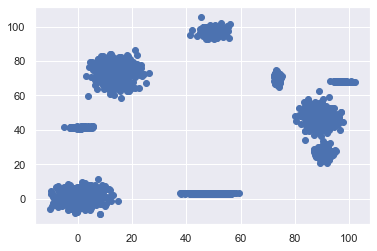

k = 2 , n_iter = 3 , runtime =  23.77 ms
k = 3 , n_iter = 5 , runtime =  32.06 ms
k = 4 , n_iter = 12 , runtime =  39.56 ms
k = 5 , n_iter = 6 , runtime =  51.72 ms
k = 6 , n_iter = 11 , runtime =  51.22 ms
k = 7 , n_iter = 13 , runtime =  56.89 ms
k = 8 , n_iter = 8 , runtime =  60.12 ms
k = 9 , n_iter = 17 , runtime =  74.86 ms
k = 10 , n_iter = 29 , runtime =  84.71 ms

2d-20c-no0.arff


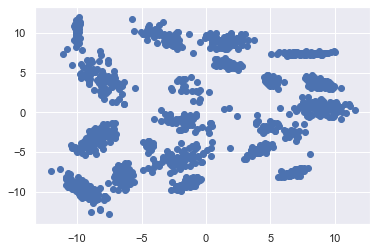

k = 2 , n_iter = 3 , runtime =  24.42 ms
k = 3 , n_iter = 5 , runtime =  35.07 ms
k = 4 , n_iter = 12 , runtime =  40.85 ms
k = 5 , n_iter = 6 , runtime =  51.77 ms
k = 6 , n_iter = 11 , runtime =  52.62 ms
k = 7 , n_iter = 13 , runtime =  59.88 ms
k = 8 , n_iter = 8 , runtime =  61.58 ms
k = 9 , n_iter = 17 , runtime =  64.8 ms
k = 10 , n_iter = 29 , runtime =  68.82 ms

2d-3c-no123.arff


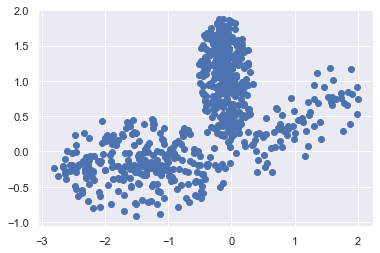

k = 2 , n_iter = 3 , runtime =  29.04 ms
k = 3 , n_iter = 5 , runtime =  39.57 ms
k = 4 , n_iter = 12 , runtime =  51.91 ms
k = 5 , n_iter = 6 , runtime =  56.14 ms
k = 6 , n_iter = 11 , runtime =  58.56 ms
k = 7 , n_iter = 13 , runtime =  56.04 ms
k = 8 , n_iter = 8 , runtime =  58.53 ms
k = 9 , n_iter = 17 , runtime =  65.54 ms
k = 10 , n_iter = 29 , runtime =  73.28 ms

2d-4c-no4.arff


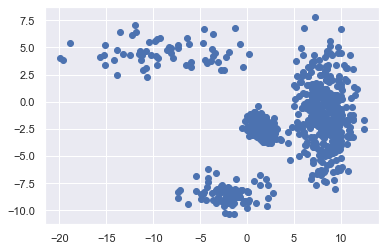

k = 2 , n_iter = 3 , runtime =  24.22 ms
k = 3 , n_iter = 5 , runtime =  33.54 ms
k = 4 , n_iter = 12 , runtime =  38.76 ms
k = 5 , n_iter = 6 , runtime =  53.15 ms
k = 6 , n_iter = 11 , runtime =  56.04 ms
k = 7 , n_iter = 13 , runtime =  66.07 ms
k = 8 , n_iter = 8 , runtime =  65.72 ms
k = 9 , n_iter = 17 , runtime =  72.2 ms
k = 10 , n_iter = 29 , runtime =  70.22 ms

2d-4c-no9.arff


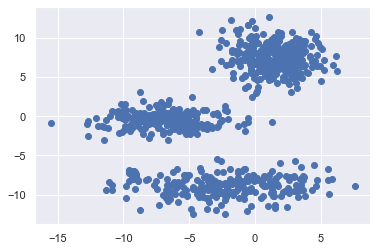

k = 2 , n_iter = 3 , runtime =  23.49 ms
k = 3 , n_iter = 5 , runtime =  38.1 ms
k = 4 , n_iter = 12 , runtime =  44.53 ms
k = 5 , n_iter = 6 , runtime =  62.46 ms
k = 6 , n_iter = 11 , runtime =  54.64 ms
k = 7 , n_iter = 13 , runtime =  57.38 ms
k = 8 , n_iter = 8 , runtime =  57.34 ms
k = 9 , n_iter = 17 , runtime =  65.62 ms
k = 10 , n_iter = 29 , runtime =  71.88 ms

2d-4c.arff


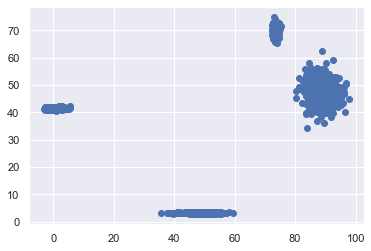

k = 2 , n_iter = 4 , runtime =  21.67 ms
k = 3 , n_iter = 5 , runtime =  32.15 ms
k = 4 , n_iter = 12 , runtime =  38.68 ms
k = 5 , n_iter = 6 , runtime =  51.11 ms
k = 6 , n_iter = 11 , runtime =  50.9 ms
k = 7 , n_iter = 13 , runtime =  58.04 ms
k = 8 , n_iter = 8 , runtime =  57.89 ms
k = 9 , n_iter = 17 , runtime =  65.68 ms
k = 10 , n_iter = 29 , runtime =  69.84 ms

2dnormals.arff


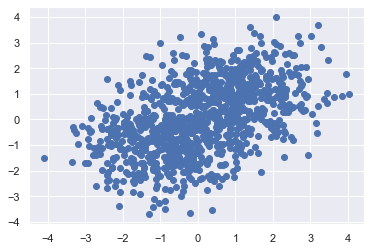

k = 2 , n_iter = 3 , runtime =  25.97 ms
k = 3 , n_iter = 5 , runtime =  38.73 ms
k = 4 , n_iter = 12 , runtime =  40.99 ms
k = 5 , n_iter = 6 , runtime =  52.67 ms
k = 6 , n_iter = 11 , runtime =  61.3 ms
k = 7 , n_iter = 13 , runtime =  62.26 ms
k = 8 , n_iter = 8 , runtime =  62.53 ms
k = 9 , n_iter = 17 , runtime =  67.27 ms
k = 10 , n_iter = 29 , runtime =  70.51 ms

2sp2glob.arff


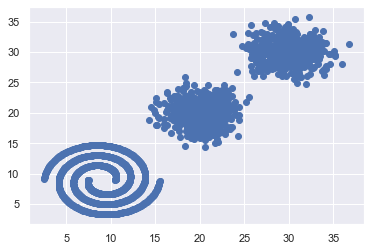

k = 2 , n_iter = 4 , runtime =  47.42 ms
k = 3 , n_iter = 5 , runtime =  31.56 ms
k = 4 , n_iter = 12 , runtime =  38.38 ms
k = 5 , n_iter = 6 , runtime =  50.02 ms
k = 6 , n_iter = 11 , runtime =  52.15 ms
k = 7 , n_iter = 13 , runtime =  56.13 ms
k = 8 , n_iter = 8 , runtime =  57.49 ms
k = 9 , n_iter = 17 , runtime =  65.61 ms
k = 10 , n_iter = 29 , runtime =  69.84 ms

3-spiral.arff


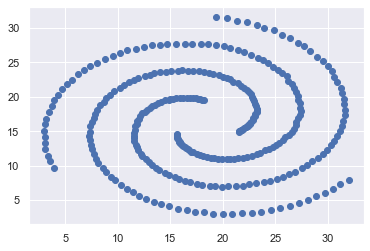

k = 2 , n_iter = 3 , runtime =  23.18 ms
k = 3 , n_iter = 5 , runtime =  37.45 ms
k = 4 , n_iter = 12 , runtime =  47.7 ms
k = 5 , n_iter = 6 , runtime =  72.77 ms
k = 6 , n_iter = 11 , runtime =  67.46 ms
k = 7 , n_iter = 13 , runtime =  66.53 ms
k = 8 , n_iter = 8 , runtime =  73.45 ms
k = 9 , n_iter = 17 , runtime =  75.23 ms
k = 10 , n_iter = 29 , runtime =  78.07 ms

aggregation.arff


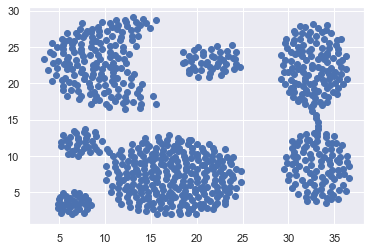

k = 2 , n_iter = 3 , runtime =  22.71 ms
k = 3 , n_iter = 5 , runtime =  32.52 ms
k = 4 , n_iter = 12 , runtime =  39.7 ms
k = 5 , n_iter = 6 , runtime =  55.75 ms
k = 6 , n_iter = 11 , runtime =  61.06 ms
k = 7 , n_iter = 13 , runtime =  65.56 ms
k = 8 , n_iter = 8 , runtime =  65.77 ms
k = 9 , n_iter = 17 , runtime =  69.3 ms
k = 10 , n_iter = 29 , runtime =  70.76 ms

aml28.arff


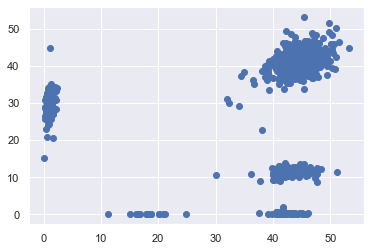

k = 2 , n_iter = 3 , runtime =  26.11 ms
k = 3 , n_iter = 5 , runtime =  39.18 ms
k = 4 , n_iter = 12 , runtime =  46.61 ms
k = 5 , n_iter = 6 , runtime =  55.98 ms
k = 6 , n_iter = 11 , runtime =  59.34 ms
k = 7 , n_iter = 13 , runtime =  57.1 ms
k = 8 , n_iter = 8 , runtime =  59.09 ms
k = 9 , n_iter = 17 , runtime =  69.89 ms
k = 10 , n_iter = 29 , runtime =  75.57 ms

atom.arff


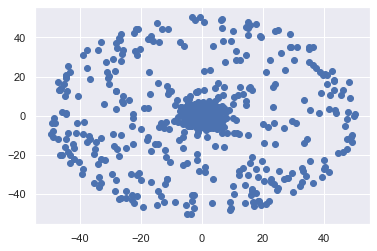

k = 2 , n_iter = 4 , runtime =  21.53 ms
k = 3 , n_iter = 5 , runtime =  34.36 ms
k = 4 , n_iter = 12 , runtime =  38.94 ms
k = 5 , n_iter = 6 , runtime =  49.62 ms
k = 6 , n_iter = 11 , runtime =  51.58 ms
k = 7 , n_iter = 13 , runtime =  57.2 ms
k = 8 , n_iter = 8 , runtime =  67.6 ms
k = 9 , n_iter = 17 , runtime =  73.11 ms
k = 10 , n_iter = 29 , runtime =  74.87 ms

banana.arff


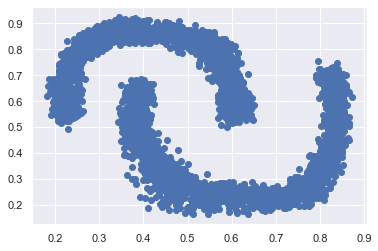

k = 2 , n_iter = 3 , runtime =  29.94 ms
k = 3 , n_iter = 5 , runtime =  37.7 ms
k = 4 , n_iter = 12 , runtime =  47.0 ms
k = 5 , n_iter = 6 , runtime =  56.8 ms
k = 6 , n_iter = 11 , runtime =  53.34 ms
k = 7 , n_iter = 13 , runtime =  58.46 ms
k = 8 , n_iter = 8 , runtime =  59.27 ms
k = 9 , n_iter = 17 , runtime =  65.17 ms
k = 10 , n_iter = 29 , runtime =  73.32 ms

birch-rg1.arff


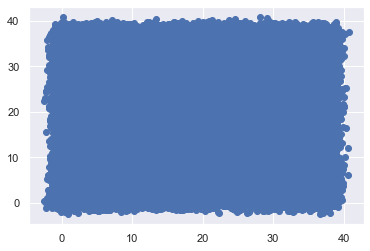

k = 2 , n_iter = 4 , runtime =  28.78 ms
k = 3 , n_iter = 5 , runtime =  40.61 ms
k = 4 , n_iter = 12 , runtime =  50.92 ms
k = 5 , n_iter = 6 , runtime =  57.78 ms
k = 6 , n_iter = 11 , runtime =  66.46 ms
k = 7 , n_iter = 13 , runtime =  67.13 ms
k = 8 , n_iter = 8 , runtime =  57.54 ms
k = 9 , n_iter = 17 , runtime =  65.29 ms
k = 10 , n_iter = 29 , runtime =  73.53 ms

birch-rg2.arff


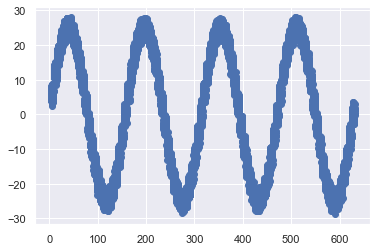

k = 2 , n_iter = 4 , runtime =  24.28 ms
k = 3 , n_iter = 5 , runtime =  32.73 ms
k = 4 , n_iter = 12 , runtime =  40.34 ms
k = 5 , n_iter = 6 , runtime =  52.66 ms
k = 6 , n_iter = 11 , runtime =  51.61 ms
k = 7 , n_iter = 13 , runtime =  55.63 ms
k = 8 , n_iter = 8 , runtime =  58.66 ms
k = 9 , n_iter = 17 , runtime =  65.39 ms
k = 10 , n_iter = 29 , runtime =  69.22 ms

birch-rg3.arff


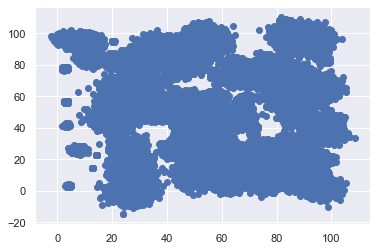

k = 2 , n_iter = 3 , runtime =  24.48 ms
k = 3 , n_iter = 5 , runtime =  32.13 ms
k = 4 , n_iter = 12 , runtime =  39.58 ms
k = 5 , n_iter = 6 , runtime =  52.65 ms
k = 6 , n_iter = 11 , runtime =  63.5 ms
k = 7 , n_iter = 13 , runtime =  67.9 ms
k = 8 , n_iter = 8 , runtime =  64.69 ms
k = 9 , n_iter = 17 , runtime =  74.27 ms
k = 10 , n_iter = 29 , runtime =  78.33 ms

blobs.arff


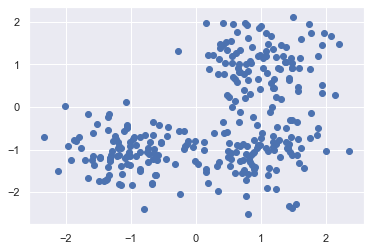

k = 2 , n_iter = 3 , runtime =  24.97 ms
k = 3 , n_iter = 5 , runtime =  35.37 ms
k = 4 , n_iter = 12 , runtime =  43.02 ms
k = 5 , n_iter = 6 , runtime =  56.33 ms
k = 6 , n_iter = 11 , runtime =  60.66 ms
k = 7 , n_iter = 13 , runtime =  57.37 ms
k = 8 , n_iter = 8 , runtime =  58.74 ms
k = 9 , n_iter = 17 , runtime =  66.48 ms
k = 10 , n_iter = 29 , runtime =  69.86 ms

cassini.arff


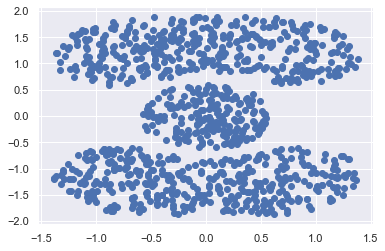

k = 2 , n_iter = 3 , runtime =  24.56 ms
k = 3 , n_iter = 5 , runtime =  32.17 ms
k = 4 , n_iter = 12 , runtime =  41.15 ms
k = 5 , n_iter = 6 , runtime =  52.06 ms
k = 6 , n_iter = 11 , runtime =  51.58 ms
k = 7 , n_iter = 13 , runtime =  60.05 ms
k = 8 , n_iter = 8 , runtime =  58.13 ms
k = 9 , n_iter = 17 , runtime =  72.32 ms
k = 10 , n_iter = 29 , runtime =  84.76 ms

chainlink.arff


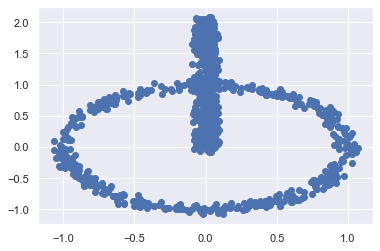

k = 2 , n_iter = 4 , runtime =  22.69 ms
k = 3 , n_iter = 5 , runtime =  36.39 ms
k = 4 , n_iter = 12 , runtime =  39.49 ms
k = 5 , n_iter = 6 , runtime =  56.9 ms
k = 6 , n_iter = 11 , runtime =  56.65 ms
k = 7 , n_iter = 13 , runtime =  61.63 ms
k = 8 , n_iter = 8 , runtime =  63.58 ms
k = 9 , n_iter = 17 , runtime =  69.51 ms
k = 10 , n_iter = 29 , runtime =  70.01 ms

circle.arff


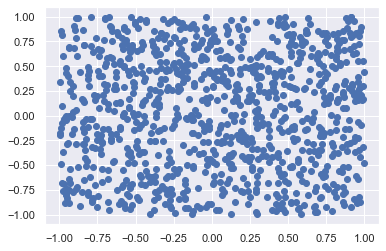

k = 2 , n_iter = 4 , runtime =  24.25 ms
k = 3 , n_iter = 5 , runtime =  34.7 ms
k = 4 , n_iter = 12 , runtime =  37.79 ms
k = 5 , n_iter = 6 , runtime =  50.32 ms
k = 6 , n_iter = 11 , runtime =  51.58 ms
k = 7 , n_iter = 13 , runtime =  55.38 ms
k = 8 , n_iter = 8 , runtime =  59.25 ms
k = 9 , n_iter = 17 , runtime =  64.84 ms
k = 10 , n_iter = 29 , runtime =  70.08 ms

cluto-t4-8k.arff


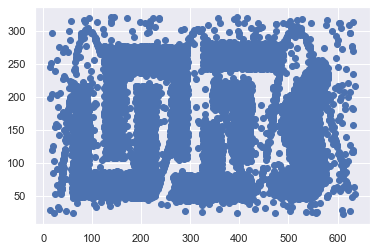

k = 2 , n_iter = 3 , runtime =  21.33 ms
k = 3 , n_iter = 5 , runtime =  32.48 ms
k = 4 , n_iter = 12 , runtime =  38.6 ms
k = 5 , n_iter = 6 , runtime =  51.18 ms
k = 6 , n_iter = 11 , runtime =  51.2 ms
k = 7 , n_iter = 13 , runtime =  57.19 ms
k = 8 , n_iter = 8 , runtime =  57.84 ms
k = 9 , n_iter = 17 , runtime =  69.11 ms
k = 10 , n_iter = 29 , runtime =  91.16 ms

cluto-t5-8k.arff


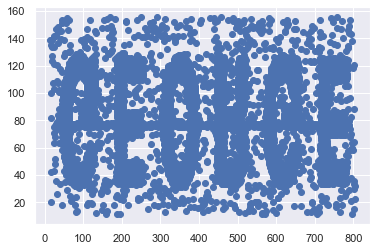

k = 2 , n_iter = 3 , runtime =  24.39 ms
k = 3 , n_iter = 5 , runtime =  35.82 ms
k = 4 , n_iter = 12 , runtime =  39.96 ms
k = 5 , n_iter = 6 , runtime =  52.14 ms
k = 6 , n_iter = 11 , runtime =  52.7 ms
k = 7 , n_iter = 13 , runtime =  56.69 ms
k = 8 , n_iter = 8 , runtime =  57.98 ms
k = 9 , n_iter = 17 , runtime =  64.63 ms
k = 10 , n_iter = 29 , runtime =  70.52 ms

cluto-t7-10k.arff


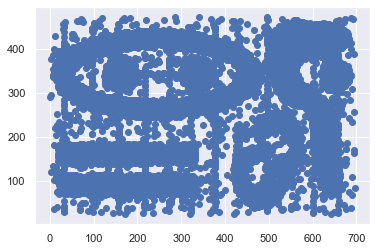

k = 2 , n_iter = 4 , runtime =  22.59 ms
k = 3 , n_iter = 5 , runtime =  33.1 ms
k = 4 , n_iter = 12 , runtime =  39.89 ms
k = 5 , n_iter = 6 , runtime =  53.72 ms
k = 6 , n_iter = 11 , runtime =  55.93 ms
k = 7 , n_iter = 13 , runtime =  56.91 ms
k = 8 , n_iter = 8 , runtime =  58.71 ms
k = 9 , n_iter = 17 , runtime =  67.83 ms
k = 10 , n_iter = 29 , runtime =  69.87 ms

cluto-t8-8k.arff


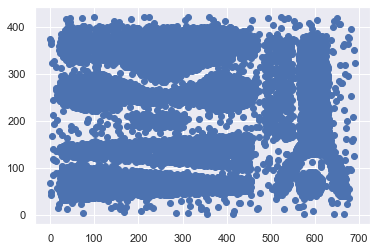

k = 2 , n_iter = 4 , runtime =  23.98 ms
k = 3 , n_iter = 5 , runtime =  35.03 ms
k = 4 , n_iter = 12 , runtime =  40.1 ms
k = 5 , n_iter = 6 , runtime =  51.79 ms
k = 6 , n_iter = 11 , runtime =  52.36 ms
k = 7 , n_iter = 13 , runtime =  57.5 ms
k = 8 , n_iter = 8 , runtime =  62.62 ms
k = 9 , n_iter = 17 , runtime =  67.59 ms
k = 10 , n_iter = 29 , runtime =  77.1 ms

complex8.arff


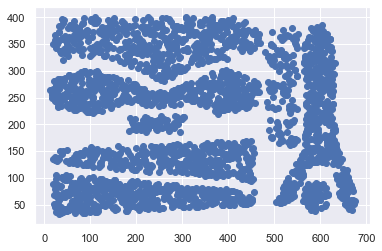

k = 2 , n_iter = 3 , runtime =  24.7 ms
k = 3 , n_iter = 5 , runtime =  34.74 ms
k = 4 , n_iter = 12 , runtime =  40.25 ms
k = 5 , n_iter = 6 , runtime =  56.27 ms
k = 6 , n_iter = 11 , runtime =  58.5 ms
k = 7 , n_iter = 13 , runtime =  60.38 ms
k = 8 , n_iter = 8 , runtime =  67.89 ms
k = 9 , n_iter = 17 , runtime =  66.84 ms
k = 10 , n_iter = 29 , runtime =  69.76 ms

complex9.arff


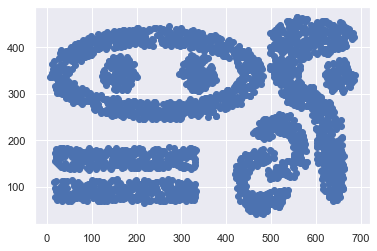

k = 2 , n_iter = 3 , runtime =  22.61 ms
k = 3 , n_iter = 5 , runtime =  32.03 ms
k = 4 , n_iter = 12 , runtime =  39.38 ms
k = 5 , n_iter = 6 , runtime =  59.82 ms
k = 6 , n_iter = 11 , runtime =  64.51 ms
k = 7 , n_iter = 13 , runtime =  62.75 ms
k = 8 , n_iter = 8 , runtime =  59.88 ms
k = 9 , n_iter = 17 , runtime =  66.82 ms
k = 10 , n_iter = 29 , runtime =  71.44 ms

compound.arff


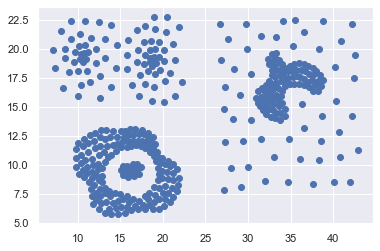

k = 2 , n_iter = 3 , runtime =  22.18 ms
k = 3 , n_iter = 5 , runtime =  32.8 ms
k = 4 , n_iter = 12 , runtime =  40.09 ms
k = 5 , n_iter = 6 , runtime =  52.37 ms
k = 6 , n_iter = 11 , runtime =  52.93 ms
k = 7 , n_iter = 13 , runtime =  73.04 ms
k = 8 , n_iter = 8 , runtime =  62.68 ms
k = 9 , n_iter = 17 , runtime =  76.03 ms
k = 10 , n_iter = 29 , runtime =  70.71 ms

cuboids.arff


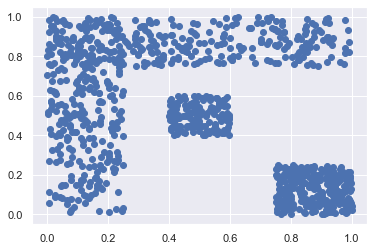

k = 2 , n_iter = 4 , runtime =  25.1 ms
k = 3 , n_iter = 5 , runtime =  32.44 ms
k = 4 , n_iter = 12 , runtime =  40.13 ms
k = 5 , n_iter = 6 , runtime =  50.52 ms
k = 6 , n_iter = 11 , runtime =  53.16 ms
k = 7 , n_iter = 13 , runtime =  56.56 ms
k = 8 , n_iter = 8 , runtime =  71.54 ms
k = 9 , n_iter = 17 , runtime =  76.66 ms
k = 10 , n_iter = 29 , runtime =  73.99 ms

cure-t0-2000n-2D.arff


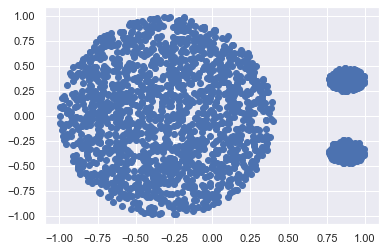

k = 2 , n_iter = 3 , runtime =  25.17 ms
k = 3 , n_iter = 5 , runtime =  35.91 ms
k = 4 , n_iter = 12 , runtime =  47.52 ms
k = 5 , n_iter = 6 , runtime =  51.29 ms
k = 6 , n_iter = 11 , runtime =  55.25 ms
k = 7 , n_iter = 13 , runtime =  66.58 ms
k = 8 , n_iter = 8 , runtime =  67.88 ms
k = 9 , n_iter = 17 , runtime =  70.61 ms
k = 10 , n_iter = 29 , runtime =  78.53 ms

cure-t1-2000n-2D.arff


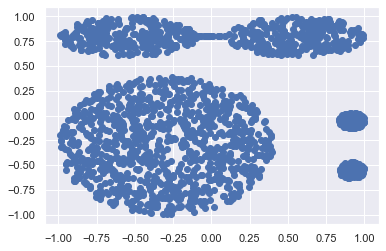

k = 2 , n_iter = 3 , runtime =  23.22 ms
k = 3 , n_iter = 5 , runtime =  32.19 ms
k = 4 , n_iter = 12 , runtime =  40.26 ms
k = 5 , n_iter = 6 , runtime =  51.15 ms
k = 6 , n_iter = 11 , runtime =  63.28 ms
k = 7 , n_iter = 13 , runtime =  66.89 ms
k = 8 , n_iter = 8 , runtime =  63.95 ms
k = 9 , n_iter = 17 , runtime =  73.58 ms
k = 10 , n_iter = 29 , runtime =  70.71 ms

cure-t2-4k.arff


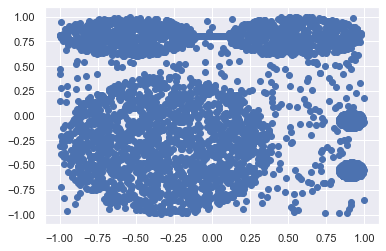

k = 2 , n_iter = 4 , runtime =  22.34 ms
k = 3 , n_iter = 5 , runtime =  33.06 ms
k = 4 , n_iter = 12 , runtime =  46.84 ms
k = 5 , n_iter = 6 , runtime =  63.62 ms
k = 6 , n_iter = 11 , runtime =  57.68 ms
k = 7 , n_iter = 13 , runtime =  58.6 ms
k = 8 , n_iter = 8 , runtime =  58.3 ms
k = 9 , n_iter = 17 , runtime =  65.58 ms
k = 10 , n_iter = 29 , runtime =  82.51 ms

curves1.arff


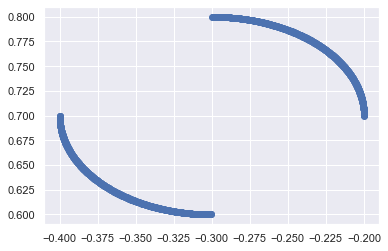

k = 2 , n_iter = 3 , runtime =  24.54 ms
k = 3 , n_iter = 5 , runtime =  46.99 ms
k = 4 , n_iter = 12 , runtime =  45.36 ms
k = 5 , n_iter = 6 , runtime =  55.0 ms
k = 6 , n_iter = 11 , runtime =  54.41 ms
k = 7 , n_iter = 13 , runtime =  57.03 ms
k = 8 , n_iter = 8 , runtime =  58.08 ms
k = 9 , n_iter = 17 , runtime =  68.34 ms
k = 10 , n_iter = 29 , runtime =  80.35 ms

curves2.arff


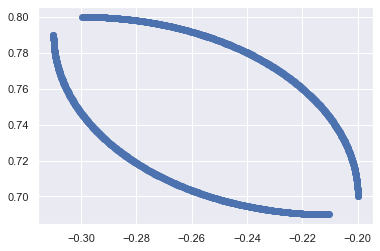

k = 2 , n_iter = 4 , runtime =  24.62 ms
k = 3 , n_iter = 5 , runtime =  45.99 ms
k = 4 , n_iter = 12 , runtime =  48.13 ms
k = 5 , n_iter = 6 , runtime =  56.4 ms
k = 6 , n_iter = 11 , runtime =  58.6 ms
k = 7 , n_iter = 13 , runtime =  62.77 ms
k = 8 , n_iter = 8 , runtime =  57.16 ms
k = 9 , n_iter = 17 , runtime =  66.46 ms
k = 10 , n_iter = 29 , runtime =  91.17 ms

D31.arff


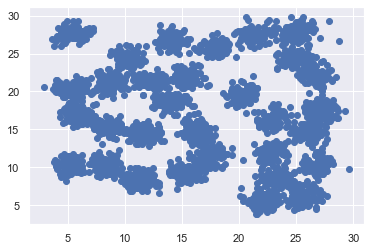

k = 2 , n_iter = 3 , runtime =  24.18 ms
k = 3 , n_iter = 5 , runtime =  38.36 ms
k = 4 , n_iter = 12 , runtime =  46.86 ms
k = 5 , n_iter = 6 , runtime =  56.37 ms
k = 6 , n_iter = 11 , runtime =  53.34 ms
k = 7 , n_iter = 13 , runtime =  57.72 ms
k = 8 , n_iter = 8 , runtime =  57.75 ms
k = 9 , n_iter = 17 , runtime =  73.61 ms
k = 10 , n_iter = 29 , runtime =  86.46 ms

dartboard1.arff


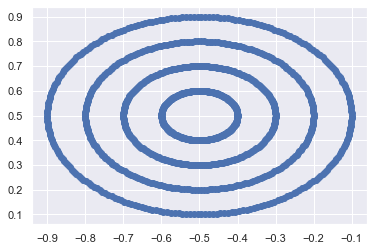

k = 2 , n_iter = 4 , runtime =  24.37 ms
k = 3 , n_iter = 5 , runtime =  35.25 ms
k = 4 , n_iter = 12 , runtime =  51.91 ms
k = 5 , n_iter = 6 , runtime =  54.11 ms
k = 6 , n_iter = 11 , runtime =  57.0 ms
k = 7 , n_iter = 13 , runtime =  58.13 ms
k = 8 , n_iter = 8 , runtime =  63.71 ms
k = 9 , n_iter = 17 , runtime =  74.57 ms
k = 10 , n_iter = 29 , runtime =  83.54 ms

dartboard2.arff


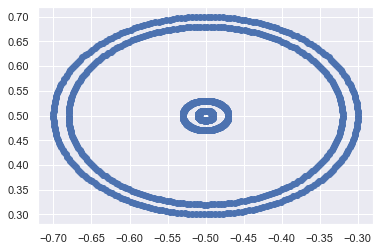

k = 2 , n_iter = 4 , runtime =  25.88 ms
k = 3 , n_iter = 5 , runtime =  39.24 ms
k = 4 , n_iter = 12 , runtime =  44.36 ms
k = 5 , n_iter = 6 , runtime =  54.03 ms
k = 6 , n_iter = 11 , runtime =  53.12 ms
k = 7 , n_iter = 13 , runtime =  56.37 ms
k = 8 , n_iter = 8 , runtime =  67.64 ms
k = 9 , n_iter = 17 , runtime =  71.53 ms
k = 10 , n_iter = 29 , runtime =  79.55 ms

dense-disk-3000.arff


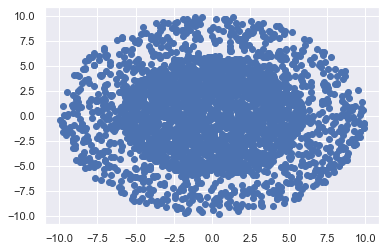

k = 2 , n_iter = 3 , runtime =  23.15 ms
k = 3 , n_iter = 5 , runtime =  36.09 ms
k = 4 , n_iter = 12 , runtime =  43.0 ms
k = 5 , n_iter = 6 , runtime =  53.77 ms
k = 6 , n_iter = 11 , runtime =  60.35 ms
k = 7 , n_iter = 13 , runtime =  62.09 ms
k = 8 , n_iter = 8 , runtime =  65.35 ms
k = 9 , n_iter = 17 , runtime =  73.84 ms
k = 10 , n_iter = 29 , runtime =  72.57 ms

dense-disk-5000.arff


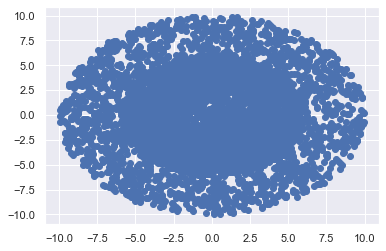

k = 2 , n_iter = 3 , runtime =  26.53 ms
k = 3 , n_iter = 5 , runtime =  36.87 ms
k = 4 , n_iter = 12 , runtime =  47.25 ms
k = 5 , n_iter = 6 , runtime =  60.41 ms
k = 6 , n_iter = 11 , runtime =  59.58 ms
k = 7 , n_iter = 13 , runtime =  57.01 ms
k = 8 , n_iter = 8 , runtime =  58.9 ms
k = 9 , n_iter = 17 , runtime =  70.91 ms
k = 10 , n_iter = 29 , runtime =  79.78 ms

diamond9.arff


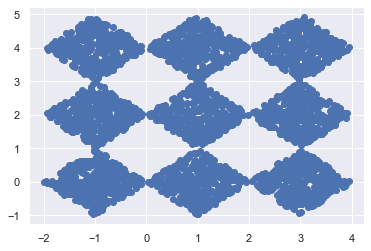

k = 2 , n_iter = 4 , runtime =  26.76 ms
k = 3 , n_iter = 5 , runtime =  41.37 ms
k = 4 , n_iter = 12 , runtime =  49.2 ms
k = 5 , n_iter = 6 , runtime =  54.81 ms
k = 6 , n_iter = 11 , runtime =  56.43 ms
k = 7 , n_iter = 13 , runtime =  56.84 ms
k = 8 , n_iter = 8 , runtime =  66.62 ms
k = 9 , n_iter = 17 , runtime =  78.91 ms
k = 10 , n_iter = 29 , runtime =  80.02 ms

disk-1000n.arff


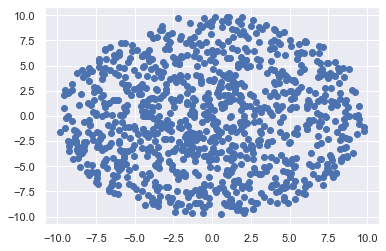

k = 2 , n_iter = 3 , runtime =  24.59 ms
k = 3 , n_iter = 5 , runtime =  37.53 ms
k = 4 , n_iter = 12 , runtime =  42.87 ms
k = 5 , n_iter = 6 , runtime =  53.72 ms
k = 6 , n_iter = 11 , runtime =  52.66 ms
k = 7 , n_iter = 13 , runtime =  58.81 ms
k = 8 , n_iter = 8 , runtime =  66.94 ms
k = 9 , n_iter = 17 , runtime =  73.97 ms
k = 10 , n_iter = 29 , runtime =  75.67 ms

disk-3000n.arff


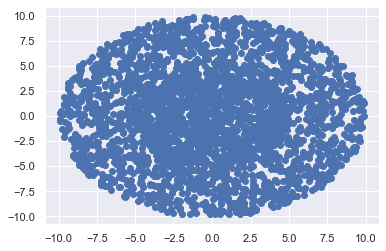

k = 2 , n_iter = 4 , runtime =  22.13 ms
k = 3 , n_iter = 5 , runtime =  36.72 ms
k = 4 , n_iter = 12 , runtime =  43.51 ms
k = 5 , n_iter = 6 , runtime =  50.7 ms
k = 6 , n_iter = 11 , runtime =  56.77 ms
k = 7 , n_iter = 13 , runtime =  67.4 ms
k = 8 , n_iter = 8 , runtime =  61.75 ms
k = 9 , n_iter = 17 , runtime =  76.44 ms
k = 10 , n_iter = 29 , runtime =  73.01 ms

disk-4000n.arff


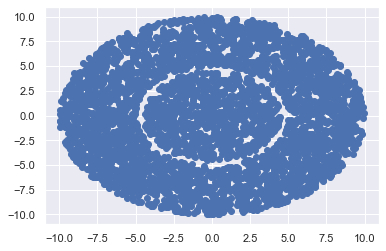

k = 2 , n_iter = 3 , runtime =  28.2 ms
k = 3 , n_iter = 5 , runtime =  35.02 ms
k = 4 , n_iter = 12 , runtime =  42.7 ms
k = 5 , n_iter = 6 , runtime =  50.37 ms
k = 6 , n_iter = 11 , runtime =  51.91 ms
k = 7 , n_iter = 13 , runtime =  58.0 ms
k = 8 , n_iter = 8 , runtime =  58.75 ms
k = 9 , n_iter = 17 , runtime =  66.84 ms
k = 10 , n_iter = 29 , runtime =  70.87 ms

disk-4500n.arff


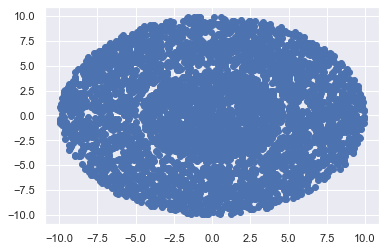

k = 2 , n_iter = 3 , runtime =  22.97 ms
k = 3 , n_iter = 5 , runtime =  31.8 ms
k = 4 , n_iter = 12 , runtime =  40.11 ms
k = 5 , n_iter = 6 , runtime =  51.27 ms
k = 6 , n_iter = 11 , runtime =  52.05 ms
k = 7 , n_iter = 13 , runtime =  62.32 ms
k = 8 , n_iter = 8 , runtime =  57.97 ms
k = 9 , n_iter = 17 , runtime =  66.99 ms
k = 10 , n_iter = 29 , runtime =  70.42 ms

disk-4600n.arff


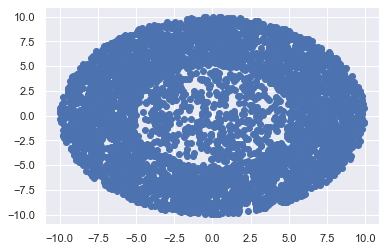

k = 2 , n_iter = 3 , runtime =  27.73 ms
k = 3 , n_iter = 5 , runtime =  43.72 ms
k = 4 , n_iter = 12 , runtime =  42.45 ms
k = 5 , n_iter = 6 , runtime =  52.17 ms
k = 6 , n_iter = 11 , runtime =  52.89 ms
k = 7 , n_iter = 13 , runtime =  59.25 ms
k = 8 , n_iter = 8 , runtime =  57.9 ms
k = 9 , n_iter = 17 , runtime =  66.79 ms
k = 10 , n_iter = 29 , runtime =  74.61 ms

disk-5000n.arff


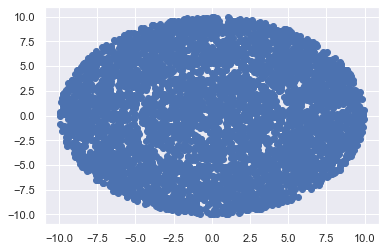

k = 2 , n_iter = 3 , runtime =  27.37 ms
k = 3 , n_iter = 5 , runtime =  32.8 ms
k = 4 , n_iter = 12 , runtime =  40.27 ms
k = 5 , n_iter = 6 , runtime =  53.37 ms
k = 6 , n_iter = 11 , runtime =  59.37 ms
k = 7 , n_iter = 13 , runtime =  62.2 ms
k = 8 , n_iter = 8 , runtime =  63.9 ms
k = 9 , n_iter = 17 , runtime =  73.29 ms
k = 10 , n_iter = 29 , runtime =  69.63 ms

disk-6000n.arff


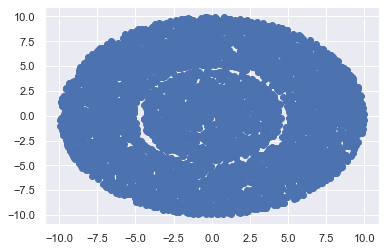

k = 2 , n_iter = 3 , runtime =  22.76 ms
k = 3 , n_iter = 5 , runtime =  31.55 ms
k = 4 , n_iter = 12 , runtime =  39.05 ms
k = 5 , n_iter = 6 , runtime =  56.25 ms
k = 6 , n_iter = 11 , runtime =  61.49 ms
k = 7 , n_iter = 13 , runtime =  64.97 ms
k = 8 , n_iter = 8 , runtime =  63.35 ms
k = 9 , n_iter = 17 , runtime =  65.46 ms
k = 10 , n_iter = 29 , runtime =  71.43 ms

donut1.arff


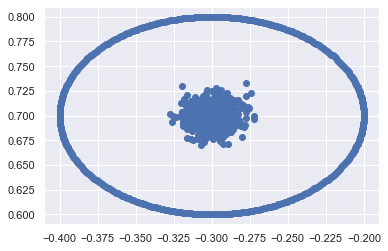

k = 2 , n_iter = 3 , runtime =  22.71 ms
k = 3 , n_iter = 5 , runtime =  35.58 ms
k = 4 , n_iter = 12 , runtime =  38.17 ms
k = 5 , n_iter = 6 , runtime =  50.12 ms
k = 6 , n_iter = 11 , runtime =  52.21 ms
k = 7 , n_iter = 13 , runtime =  64.0 ms
k = 8 , n_iter = 8 , runtime =  67.43 ms
k = 9 , n_iter = 17 , runtime =  72.77 ms
k = 10 , n_iter = 29 , runtime =  73.02 ms

donut2.arff


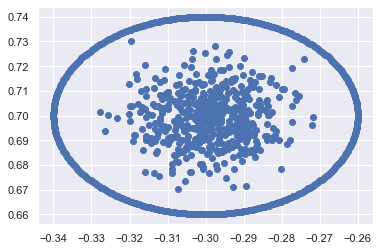

k = 2 , n_iter = 3 , runtime =  22.39 ms
k = 3 , n_iter = 5 , runtime =  37.11 ms
k = 4 , n_iter = 12 , runtime =  44.57 ms
k = 5 , n_iter = 6 , runtime =  55.04 ms
k = 6 , n_iter = 11 , runtime =  58.67 ms
k = 7 , n_iter = 13 , runtime =  57.35 ms
k = 8 , n_iter = 8 , runtime =  57.97 ms
k = 9 , n_iter = 17 , runtime =  72.04 ms
k = 10 , n_iter = 29 , runtime =  83.9 ms

donut3.arff


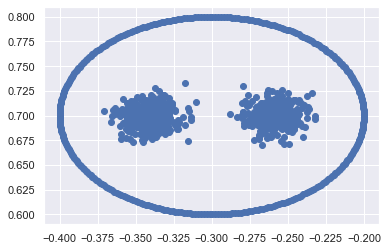

k = 2 , n_iter = 3 , runtime =  21.58 ms
k = 3 , n_iter = 5 , runtime =  35.91 ms
k = 4 , n_iter = 12 , runtime =  43.62 ms
k = 5 , n_iter = 6 , runtime =  58.77 ms
k = 6 , n_iter = 11 , runtime =  57.7 ms
k = 7 , n_iter = 13 , runtime =  59.58 ms
k = 8 , n_iter = 8 , runtime =  57.65 ms
k = 9 , n_iter = 17 , runtime =  65.92 ms
k = 10 , n_iter = 29 , runtime =  72.45 ms

donutcurves.arff


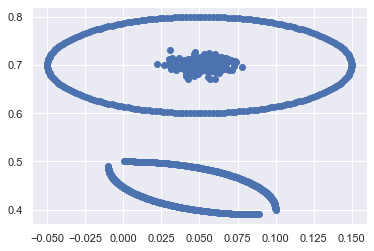

k = 2 , n_iter = 3 , runtime =  23.94 ms
k = 3 , n_iter = 5 , runtime =  32.93 ms
k = 4 , n_iter = 12 , runtime =  41.13 ms
k = 5 , n_iter = 6 , runtime =  50.55 ms
k = 6 , n_iter = 11 , runtime =  51.89 ms
k = 7 , n_iter = 13 , runtime =  56.01 ms
k = 8 , n_iter = 8 , runtime =  60.67 ms
k = 9 , n_iter = 17 , runtime =  80.8 ms
k = 10 , n_iter = 29 , runtime =  81.4 ms

dpb.arff


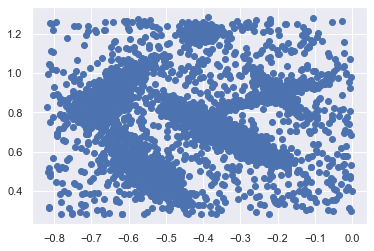

k = 2 , n_iter = 4 , runtime =  24.48 ms
k = 3 , n_iter = 5 , runtime =  39.18 ms
k = 4 , n_iter = 12 , runtime =  47.55 ms
k = 5 , n_iter = 6 , runtime =  58.72 ms
k = 6 , n_iter = 11 , runtime =  53.01 ms
k = 7 , n_iter = 13 , runtime =  57.05 ms
k = 8 , n_iter = 8 , runtime =  58.63 ms
k = 9 , n_iter = 17 , runtime =  65.84 ms
k = 10 , n_iter = 29 , runtime =  81.15 ms

dpc.arff


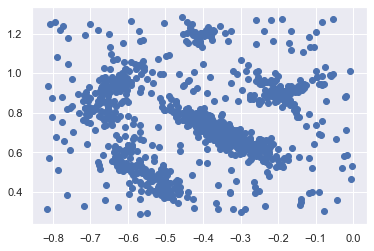

k = 2 , n_iter = 3 , runtime =  22.33 ms
k = 3 , n_iter = 5 , runtime =  31.67 ms
k = 4 , n_iter = 12 , runtime =  38.74 ms
k = 5 , n_iter = 6 , runtime =  56.24 ms
k = 6 , n_iter = 11 , runtime =  66.72 ms
k = 7 , n_iter = 13 , runtime =  67.49 ms
k = 8 , n_iter = 8 , runtime =  59.58 ms
k = 9 , n_iter = 17 , runtime =  66.55 ms
k = 10 , n_iter = 29 , runtime =  69.67 ms

ds2c2sc13.arff


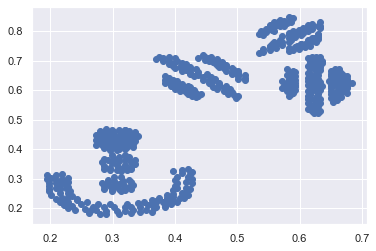

k = 2 , n_iter = 3 , runtime =  25.31 ms
k = 3 , n_iter = 5 , runtime =  38.1 ms
k = 4 , n_iter = 12 , runtime =  44.72 ms
k = 5 , n_iter = 6 , runtime =  53.7 ms
k = 6 , n_iter = 11 , runtime =  53.23 ms
k = 7 , n_iter = 13 , runtime =  57.3 ms
k = 8 , n_iter = 8 , runtime =  60.63 ms
k = 9 , n_iter = 17 , runtime =  66.01 ms
k = 10 , n_iter = 29 , runtime =  69.25 ms

ds3c3sc6.arff


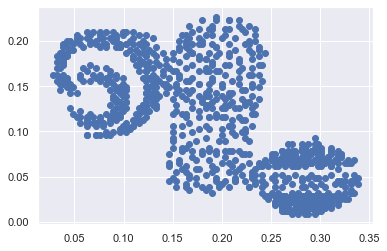

k = 2 , n_iter = 3 , runtime =  26.04 ms
k = 3 , n_iter = 5 , runtime =  32.19 ms
k = 4 , n_iter = 12 , runtime =  44.6 ms
k = 5 , n_iter = 6 , runtime =  54.93 ms
k = 6 , n_iter = 11 , runtime =  55.1 ms
k = 7 , n_iter = 13 , runtime =  59.38 ms
k = 8 , n_iter = 8 , runtime =  63.18 ms
k = 9 , n_iter = 17 , runtime =  78.61 ms
k = 10 , n_iter = 29 , runtime =  80.28 ms

ds4c2sc8.arff


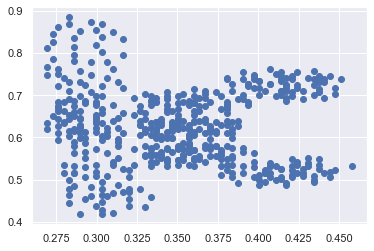

k = 2 , n_iter = 3 , runtime =  23.38 ms
k = 3 , n_iter = 5 , runtime =  33.32 ms
k = 4 , n_iter = 12 , runtime =  53.26 ms
k = 5 , n_iter = 6 , runtime =  57.16 ms
k = 6 , n_iter = 11 , runtime =  59.45 ms
k = 7 , n_iter = 13 , runtime =  56.2 ms
k = 8 , n_iter = 8 , runtime =  56.91 ms
k = 9 , n_iter = 17 , runtime =  66.66 ms
k = 10 , n_iter = 29 , runtime =  72.25 ms

elliptical_10_2.arff


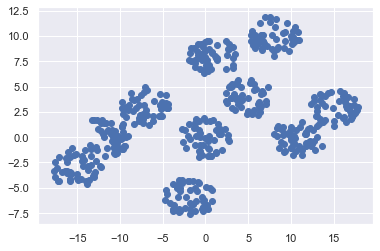

k = 2 , n_iter = 3 , runtime =  22.22 ms
k = 3 , n_iter = 5 , runtime =  32.47 ms
k = 4 , n_iter = 12 , runtime =  40.67 ms
k = 5 , n_iter = 6 , runtime =  51.27 ms
k = 6 , n_iter = 11 , runtime =  52.47 ms
k = 7 , n_iter = 13 , runtime =  63.47 ms
k = 8 , n_iter = 8 , runtime =  69.37 ms
k = 9 , n_iter = 17 , runtime =  72.85 ms
k = 10 , n_iter = 29 , runtime =  69.47 ms

elly-2d10c13s.arff


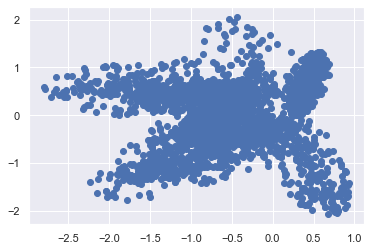

k = 2 , n_iter = 3 , runtime =  26.28 ms
k = 3 , n_iter = 5 , runtime =  38.8 ms
k = 4 , n_iter = 12 , runtime =  44.13 ms
k = 5 , n_iter = 6 , runtime =  58.21 ms
k = 6 , n_iter = 11 , runtime =  55.54 ms
k = 7 , n_iter = 13 , runtime =  56.19 ms
k = 8 , n_iter = 8 , runtime =  58.37 ms
k = 9 , n_iter = 17 , runtime =  65.12 ms
k = 10 , n_iter = 29 , runtime =  69.83 ms

engytime.arff


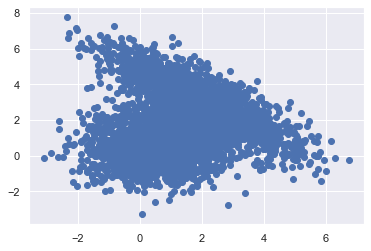

k = 2 , n_iter = 3 , runtime =  25.88 ms
k = 3 , n_iter = 5 , runtime =  32.97 ms
k = 4 , n_iter = 12 , runtime =  40.79 ms
k = 5 , n_iter = 6 , runtime =  58.66 ms
k = 6 , n_iter = 11 , runtime =  57.96 ms
k = 7 , n_iter = 13 , runtime =  64.51 ms
k = 8 , n_iter = 8 , runtime =  59.78 ms
k = 9 , n_iter = 17 , runtime =  65.22 ms
k = 10 , n_iter = 29 , runtime =  69.04 ms

flame.arff


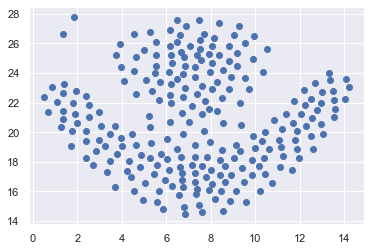

k = 2 , n_iter = 4 , runtime =  21.4 ms
k = 3 , n_iter = 5 , runtime =  30.92 ms
k = 4 , n_iter = 12 , runtime =  44.51 ms
k = 5 , n_iter = 6 , runtime =  61.88 ms
k = 6 , n_iter = 11 , runtime =  69.88 ms
k = 7 , n_iter = 13 , runtime =  60.13 ms
k = 8 , n_iter = 8 , runtime =  58.72 ms
k = 9 , n_iter = 17 , runtime =  66.11 ms
k = 10 , n_iter = 29 , runtime =  77.79 ms

fourty.arff


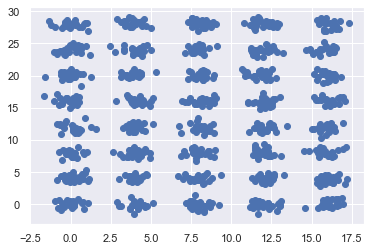

k = 2 , n_iter = 4 , runtime =  27.42 ms
k = 3 , n_iter = 5 , runtime =  34.83 ms
k = 4 , n_iter = 12 , runtime =  45.25 ms
k = 5 , n_iter = 6 , runtime =  56.91 ms
k = 6 , n_iter = 11 , runtime =  57.29 ms
k = 7 , n_iter = 13 , runtime =  59.23 ms
k = 8 , n_iter = 8 , runtime =  58.5 ms
k = 9 , n_iter = 17 , runtime =  67.46 ms
k = 10 , n_iter = 29 , runtime =  78.57 ms

gaussians1.arff


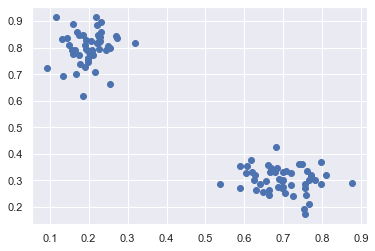

k = 2 , n_iter = 3 , runtime =  24.68 ms
k = 3 , n_iter = 5 , runtime =  33.42 ms
k = 4 , n_iter = 12 , runtime =  41.91 ms
k = 5 , n_iter = 6 , runtime =  56.34 ms
k = 6 , n_iter = 11 , runtime =  59.69 ms
k = 7 , n_iter = 13 , runtime =  59.22 ms
k = 8 , n_iter = 8 , runtime =  60.39 ms
k = 9 , n_iter = 17 , runtime =  65.7 ms
k = 10 , n_iter = 29 , runtime =  69.3 ms

golfball.arff


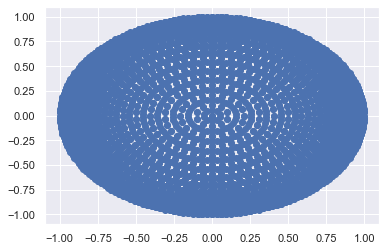

k = 2 , n_iter = 3 , runtime =  25.0 ms
k = 3 , n_iter = 5 , runtime =  31.17 ms
k = 4 , n_iter = 12 , runtime =  40.02 ms
k = 5 , n_iter = 6 , runtime =  56.11 ms
k = 6 , n_iter = 11 , runtime =  60.44 ms
k = 7 , n_iter = 13 , runtime =  60.68 ms
k = 8 , n_iter = 8 , runtime =  63.22 ms
k = 9 , n_iter = 17 , runtime =  65.81 ms
k = 10 , n_iter = 29 , runtime =  70.75 ms

hepta.arff


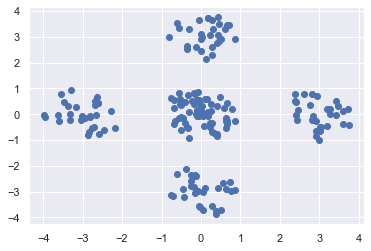

k = 2 , n_iter = 3 , runtime =  28.04 ms
k = 3 , n_iter = 5 , runtime =  34.98 ms
k = 4 , n_iter = 12 , runtime =  42.15 ms
k = 5 , n_iter = 6 , runtime =  54.46 ms
k = 6 , n_iter = 11 , runtime =  54.62 ms
k = 7 , n_iter = 13 , runtime =  58.98 ms
k = 8 , n_iter = 8 , runtime =  63.74 ms
k = 9 , n_iter = 17 , runtime =  75.28 ms
k = 10 , n_iter = 29 , runtime =  71.79 ms

hypercube.arff


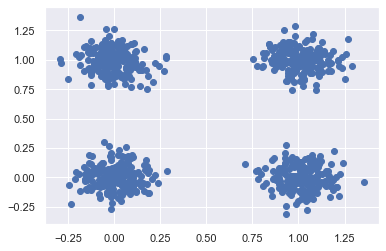

k = 2 , n_iter = 3 , runtime =  26.64 ms
k = 3 , n_iter = 5 , runtime =  35.87 ms
k = 4 , n_iter = 12 , runtime =  43.53 ms
k = 5 , n_iter = 6 , runtime =  59.6 ms
k = 6 , n_iter = 11 , runtime =  57.97 ms
k = 7 , n_iter = 13 , runtime =  60.77 ms
k = 8 , n_iter = 8 , runtime =  58.68 ms
k = 9 , n_iter = 17 , runtime =  64.96 ms
k = 10 , n_iter = 29 , runtime =  71.51 ms

impossible.arff


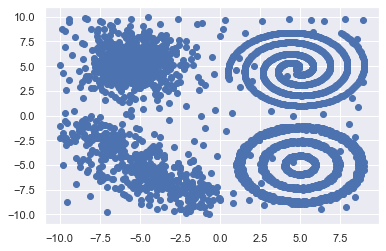

k = 2 , n_iter = 3 , runtime =  21.48 ms
k = 3 , n_iter = 5 , runtime =  33.67 ms
k = 4 , n_iter = 12 , runtime =  42.35 ms
k = 5 , n_iter = 6 , runtime =  49.34 ms
k = 6 , n_iter = 11 , runtime =  53.63 ms
k = 7 , n_iter = 13 , runtime =  57.1 ms
k = 8 , n_iter = 8 , runtime =  58.99 ms
k = 9 , n_iter = 17 , runtime =  65.39 ms
k = 10 , n_iter = 29 , runtime =  72.81 ms

insect.arff


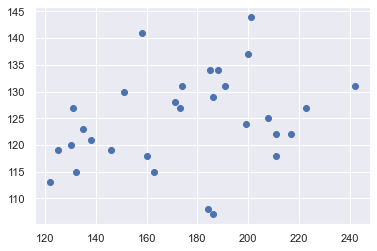

k = 2 , n_iter = 3 , runtime =  23.49 ms
k = 3 , n_iter = 5 , runtime =  31.69 ms
k = 4 , n_iter = 12 , runtime =  38.85 ms
k = 5 , n_iter = 6 , runtime =  50.66 ms
k = 6 , n_iter = 11 , runtime =  51.91 ms
k = 7 , n_iter = 13 , runtime =  54.59 ms
k = 8 , n_iter = 8 , runtime =  59.13 ms
k = 9 , n_iter = 17 , runtime =  65.86 ms
k = 10 , n_iter = 29 , runtime =  72.03 ms

jain.arff


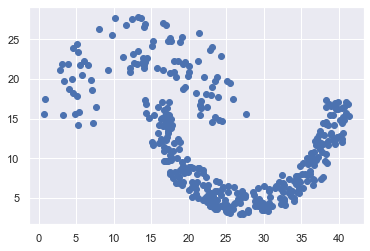

k = 2 , n_iter = 3 , runtime =  22.25 ms
k = 3 , n_iter = 5 , runtime =  34.98 ms
k = 4 , n_iter = 12 , runtime =  42.55 ms
k = 5 , n_iter = 6 , runtime =  50.99 ms
k = 6 , n_iter = 11 , runtime =  52.5 ms
k = 7 , n_iter = 13 , runtime =  58.17 ms
k = 8 , n_iter = 8 , runtime =  58.44 ms
k = 9 , n_iter = 17 , runtime =  66.9 ms
k = 10 , n_iter = 29 , runtime =  69.59 ms

long1.arff


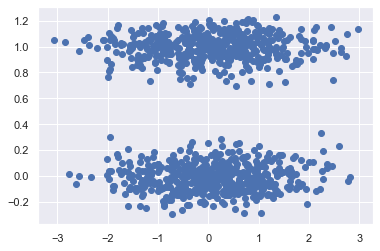

k = 2 , n_iter = 3 , runtime =  23.83 ms
k = 3 , n_iter = 5 , runtime =  32.52 ms
k = 4 , n_iter = 12 , runtime =  44.37 ms
k = 5 , n_iter = 6 , runtime =  51.03 ms
k = 6 , n_iter = 11 , runtime =  52.93 ms
k = 7 , n_iter = 13 , runtime =  57.89 ms
k = 8 , n_iter = 8 , runtime =  58.65 ms
k = 9 , n_iter = 17 , runtime =  67.31 ms
k = 10 , n_iter = 29 , runtime =  70.55 ms

long2.arff


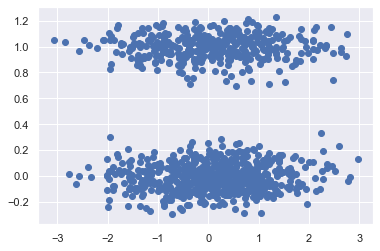

k = 2 , n_iter = 3 , runtime =  25.55 ms
k = 3 , n_iter = 5 , runtime =  34.38 ms
k = 4 , n_iter = 12 , runtime =  47.66 ms
k = 5 , n_iter = 6 , runtime =  56.11 ms
k = 6 , n_iter = 11 , runtime =  56.87 ms
k = 7 , n_iter = 13 , runtime =  59.9 ms
k = 8 , n_iter = 8 , runtime =  58.34 ms
k = 9 , n_iter = 17 , runtime =  68.34 ms
k = 10 , n_iter = 29 , runtime =  70.09 ms

long3.arff


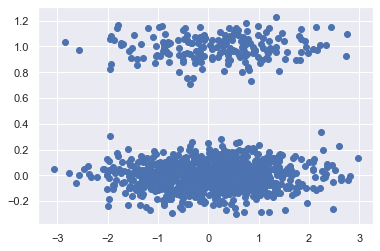

k = 2 , n_iter = 3 , runtime =  22.71 ms
k = 3 , n_iter = 5 , runtime =  32.96 ms
k = 4 , n_iter = 12 , runtime =  45.37 ms
k = 5 , n_iter = 6 , runtime =  53.47 ms
k = 6 , n_iter = 11 , runtime =  51.86 ms
k = 7 , n_iter = 13 , runtime =  57.16 ms
k = 8 , n_iter = 8 , runtime =  57.67 ms
k = 9 , n_iter = 17 , runtime =  73.17 ms
k = 10 , n_iter = 29 , runtime =  70.62 ms

longsquare.arff


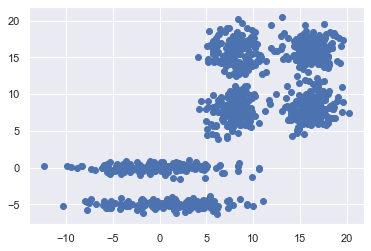

k = 2 , n_iter = 3 , runtime =  22.67 ms
k = 3 , n_iter = 5 , runtime =  34.22 ms
k = 4 , n_iter = 12 , runtime =  39.94 ms
k = 5 , n_iter = 6 , runtime =  50.19 ms
k = 6 , n_iter = 11 , runtime =  52.07 ms
k = 7 , n_iter = 13 , runtime =  55.34 ms
k = 8 , n_iter = 8 , runtime =  60.67 ms
k = 9 , n_iter = 17 , runtime =  66.99 ms
k = 10 , n_iter = 29 , runtime =  70.79 ms

lsun.arff


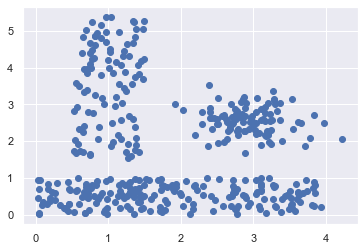

k = 2 , n_iter = 3 , runtime =  22.46 ms
k = 3 , n_iter = 5 , runtime =  33.31 ms
k = 4 , n_iter = 12 , runtime =  41.93 ms
k = 5 , n_iter = 6 , runtime =  56.87 ms
k = 6 , n_iter = 11 , runtime =  63.94 ms
k = 7 , n_iter = 13 , runtime =  71.7 ms
k = 8 , n_iter = 8 , runtime =  71.01 ms
k = 9 , n_iter = 17 , runtime =  85.69 ms
k = 10 , n_iter = 29 , runtime =  85.94 ms

mopsi-finland.arff


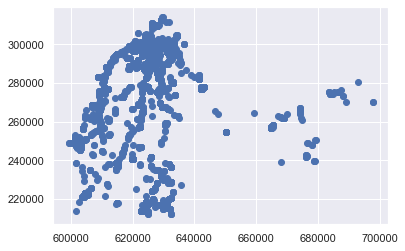

k = 2 , n_iter = 3 , runtime =  22.76 ms
k = 3 , n_iter = 5 , runtime =  35.51 ms
k = 4 , n_iter = 12 , runtime =  43.33 ms
k = 5 , n_iter = 6 , runtime =  52.73 ms
k = 6 , n_iter = 11 , runtime =  52.15 ms
k = 7 , n_iter = 13 , runtime =  57.59 ms
k = 8 , n_iter = 8 , runtime =  61.03 ms
k = 9 , n_iter = 17 , runtime =  65.33 ms
k = 10 , n_iter = 29 , runtime =  70.19 ms

mopsi-joensuu.arff


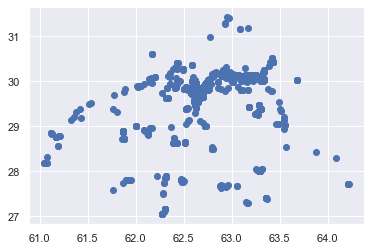

k = 2 , n_iter = 4 , runtime =  23.67 ms
k = 3 , n_iter = 5 , runtime =  33.77 ms
k = 4 , n_iter = 12 , runtime =  38.79 ms
k = 5 , n_iter = 6 , runtime =  49.82 ms
k = 6 , n_iter = 11 , runtime =  56.2 ms
k = 7 , n_iter = 13 , runtime =  60.74 ms
k = 8 , n_iter = 8 , runtime =  60.51 ms
k = 9 , n_iter = 17 , runtime =  68.88 ms
k = 10 , n_iter = 29 , runtime =  69.89 ms

pathbased.arff


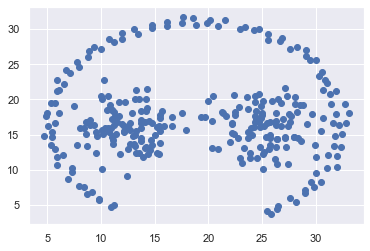

k = 2 , n_iter = 3 , runtime =  22.14 ms
k = 3 , n_iter = 5 , runtime =  35.92 ms
k = 4 , n_iter = 12 , runtime =  44.28 ms
k = 5 , n_iter = 6 , runtime =  55.11 ms
k = 6 , n_iter = 11 , runtime =  54.99 ms
k = 7 , n_iter = 13 , runtime =  62.04 ms
k = 8 , n_iter = 8 , runtime =  68.85 ms
k = 9 , n_iter = 17 , runtime =  80.84 ms
k = 10 , n_iter = 29 , runtime =  99.03 ms

pmf.arff


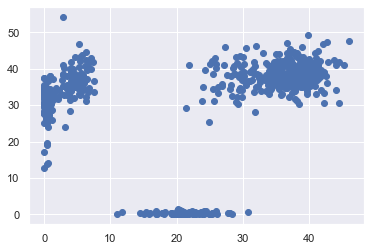

k = 2 , n_iter = 3 , runtime =  21.57 ms
k = 3 , n_iter = 5 , runtime =  31.76 ms
k = 4 , n_iter = 12 , runtime =  39.65 ms
k = 5 , n_iter = 6 , runtime =  52.66 ms
k = 6 , n_iter = 11 , runtime =  52.22 ms
k = 7 , n_iter = 13 , runtime =  55.92 ms
k = 8 , n_iter = 8 , runtime =  57.57 ms
k = 9 , n_iter = 17 , runtime =  66.43 ms
k = 10 , n_iter = 29 , runtime =  69.01 ms

R15.arff


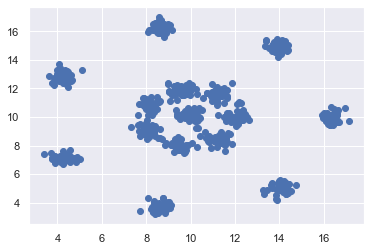

k = 2 , n_iter = 4 , runtime =  23.78 ms
k = 3 , n_iter = 5 , runtime =  31.77 ms
k = 4 , n_iter = 12 , runtime =  40.58 ms
k = 5 , n_iter = 6 , runtime =  50.58 ms
k = 6 , n_iter = 11 , runtime =  52.25 ms
k = 7 , n_iter = 13 , runtime =  55.48 ms
k = 8 , n_iter = 8 , runtime =  58.25 ms
k = 9 , n_iter = 17 , runtime =  65.54 ms
k = 10 , n_iter = 29 , runtime =  70.01 ms

rings.arff


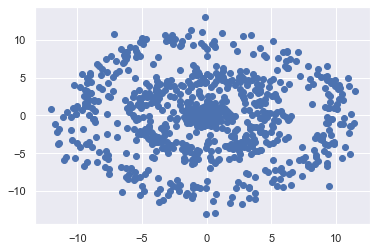

k = 2 , n_iter = 3 , runtime =  22.87 ms
k = 3 , n_iter = 5 , runtime =  30.55 ms
k = 4 , n_iter = 12 , runtime =  38.82 ms
k = 5 , n_iter = 6 , runtime =  51.64 ms
k = 6 , n_iter = 11 , runtime =  61.39 ms
k = 7 , n_iter = 13 , runtime =  63.65 ms
k = 8 , n_iter = 8 , runtime =  75.68 ms
k = 9 , n_iter = 17 , runtime =  76.81 ms
k = 10 , n_iter = 29 , runtime =  90.13 ms

s-set1.arff


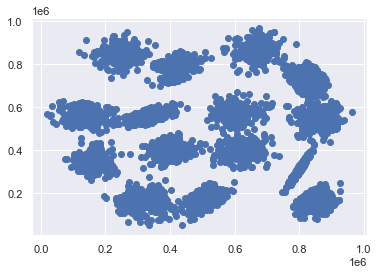

k = 2 , n_iter = 4 , runtime =  22.21 ms
k = 3 , n_iter = 5 , runtime =  34.38 ms
k = 4 , n_iter = 12 , runtime =  38.88 ms
k = 5 , n_iter = 6 , runtime =  60.83 ms
k = 6 , n_iter = 11 , runtime =  63.82 ms
k = 7 , n_iter = 13 , runtime =  58.03 ms
k = 8 , n_iter = 8 , runtime =  57.8 ms
k = 9 , n_iter = 17 , runtime =  64.29 ms
k = 10 , n_iter = 29 , runtime =  73.99 ms

s-set2.arff


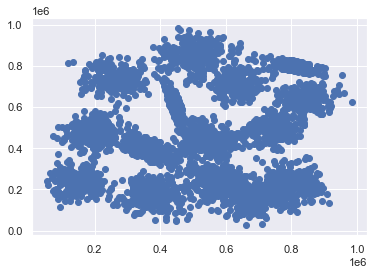

k = 2 , n_iter = 3 , runtime =  23.22 ms
k = 3 , n_iter = 5 , runtime =  30.88 ms
k = 4 , n_iter = 12 , runtime =  38.86 ms
k = 5 , n_iter = 6 , runtime =  51.46 ms
k = 6 , n_iter = 11 , runtime =  52.56 ms
k = 7 , n_iter = 13 , runtime =  56.79 ms
k = 8 , n_iter = 8 , runtime =  60.64 ms
k = 9 , n_iter = 17 , runtime =  65.78 ms
k = 10 , n_iter = 29 , runtime =  70.78 ms

s-set3.arff


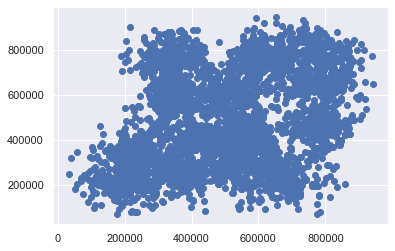

k = 2 , n_iter = 4 , runtime =  23.89 ms
k = 3 , n_iter = 5 , runtime =  42.98 ms
k = 4 , n_iter = 12 , runtime =  53.24 ms
k = 5 , n_iter = 6 , runtime =  60.13 ms
k = 6 , n_iter = 11 , runtime =  62.14 ms
k = 7 , n_iter = 13 , runtime =  68.58 ms
k = 8 , n_iter = 8 , runtime =  58.77 ms
k = 9 , n_iter = 17 , runtime =  69.26 ms
k = 10 , n_iter = 29 , runtime =  78.17 ms

s-set4.arff


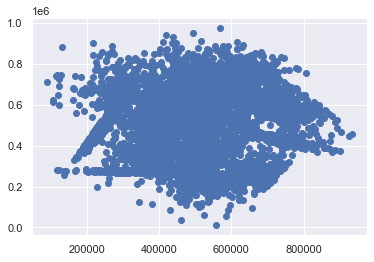

k = 2 , n_iter = 3 , runtime =  24.89 ms
k = 3 , n_iter = 5 , runtime =  41.54 ms
k = 4 , n_iter = 12 , runtime =  52.07 ms
k = 5 , n_iter = 6 , runtime =  69.66 ms
k = 6 , n_iter = 11 , runtime =  64.54 ms
k = 7 , n_iter = 13 , runtime =  57.94 ms
k = 8 , n_iter = 8 , runtime =  64.53 ms
k = 9 , n_iter = 17 , runtime =  68.89 ms
k = 10 , n_iter = 29 , runtime =  79.47 ms

shapes.arff


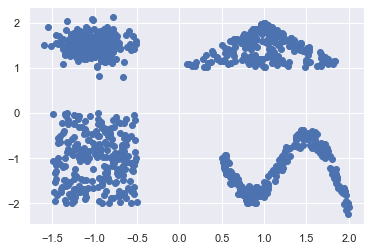

k = 2 , n_iter = 3 , runtime =  21.89 ms
k = 3 , n_iter = 5 , runtime =  31.93 ms
k = 4 , n_iter = 12 , runtime =  40.23 ms
k = 5 , n_iter = 6 , runtime =  50.62 ms
k = 6 , n_iter = 11 , runtime =  53.62 ms
k = 7 , n_iter = 13 , runtime =  55.22 ms
k = 8 , n_iter = 8 , runtime =  58.44 ms
k = 9 , n_iter = 17 , runtime =  132.0 ms
k = 10 , n_iter = 29 , runtime =  74.53 ms

simplex.arff


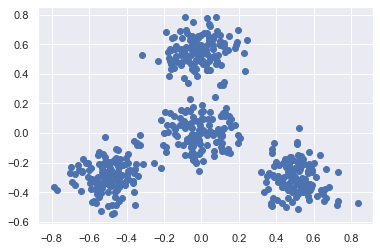

k = 2 , n_iter = 3 , runtime =  24.57 ms
k = 3 , n_iter = 5 , runtime =  31.0 ms
k = 4 , n_iter = 12 , runtime =  39.34 ms
k = 5 , n_iter = 6 , runtime =  51.23 ms
k = 6 , n_iter = 11 , runtime =  57.01 ms
k = 7 , n_iter = 13 , runtime =  61.46 ms
k = 8 , n_iter = 8 , runtime =  60.03 ms
k = 9 , n_iter = 17 , runtime =  73.49 ms
k = 10 , n_iter = 29 , runtime =  87.92 ms

sizes1.arff


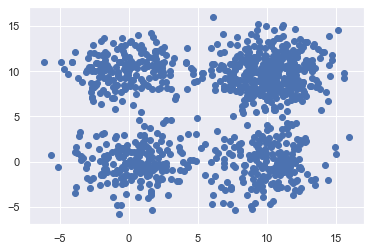

k = 2 , n_iter = 4 , runtime =  23.74 ms
k = 3 , n_iter = 5 , runtime =  38.89 ms
k = 4 , n_iter = 12 , runtime =  54.15 ms
k = 5 , n_iter = 6 , runtime =  58.35 ms
k = 6 , n_iter = 11 , runtime =  60.66 ms
k = 7 , n_iter = 13 , runtime =  63.18 ms
k = 8 , n_iter = 8 , runtime =  57.91 ms
k = 9 , n_iter = 17 , runtime =  65.9 ms
k = 10 , n_iter = 29 , runtime =  73.58 ms

sizes2.arff


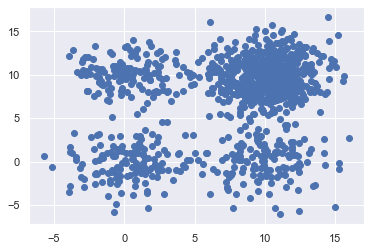

k = 2 , n_iter = 3 , runtime =  32.96 ms
k = 3 , n_iter = 5 , runtime =  33.97 ms
k = 4 , n_iter = 12 , runtime =  42.01 ms
k = 5 , n_iter = 6 , runtime =  52.66 ms
k = 6 , n_iter = 11 , runtime =  56.72 ms
k = 7 , n_iter = 13 , runtime =  64.77 ms
k = 8 , n_iter = 8 , runtime =  69.05 ms
k = 9 , n_iter = 17 , runtime =  73.08 ms
k = 10 , n_iter = 29 , runtime =  72.41 ms

sizes3.arff


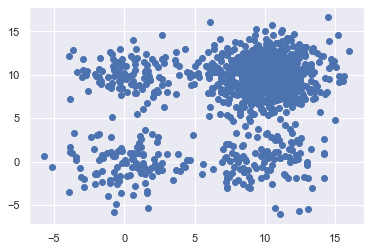

k = 2 , n_iter = 3 , runtime =  24.23 ms
k = 3 , n_iter = 5 , runtime =  35.5 ms
k = 4 , n_iter = 12 , runtime =  39.13 ms
k = 5 , n_iter = 6 , runtime =  51.58 ms
k = 6 , n_iter = 11 , runtime =  68.24 ms
k = 7 , n_iter = 13 , runtime =  84.67 ms
k = 8 , n_iter = 8 , runtime =  66.41 ms
k = 9 , n_iter = 17 , runtime =  73.44 ms
k = 10 , n_iter = 29 , runtime =  75.72 ms

sizes4.arff


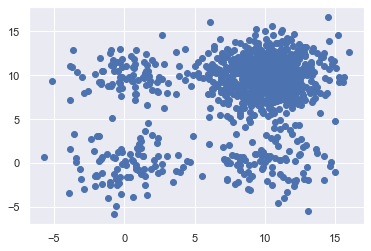

k = 2 , n_iter = 3 , runtime =  23.63 ms
k = 3 , n_iter = 5 , runtime =  35.99 ms
k = 4 , n_iter = 12 , runtime =  39.07 ms
k = 5 , n_iter = 6 , runtime =  52.46 ms
k = 6 , n_iter = 11 , runtime =  57.91 ms
k = 7 , n_iter = 13 , runtime =  80.34 ms
k = 8 , n_iter = 8 , runtime =  77.14 ms
k = 9 , n_iter = 17 , runtime =  78.08 ms
k = 10 , n_iter = 29 , runtime =  79.88 ms

sizes5.arff


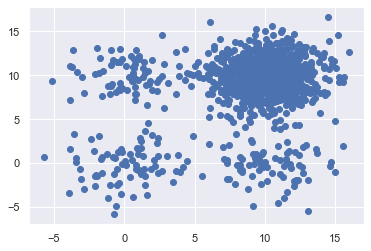

k = 2 , n_iter = 3 , runtime =  25.04 ms
k = 3 , n_iter = 5 , runtime =  37.31 ms
k = 4 , n_iter = 12 , runtime =  51.26 ms
k = 5 , n_iter = 6 , runtime =  63.59 ms
k = 6 , n_iter = 11 , runtime =  57.7 ms
k = 7 , n_iter = 13 , runtime =  54.79 ms
k = 8 , n_iter = 8 , runtime =  57.36 ms
k = 9 , n_iter = 17 , runtime =  65.65 ms
k = 10 , n_iter = 29 , runtime =  75.05 ms

smile1.arff


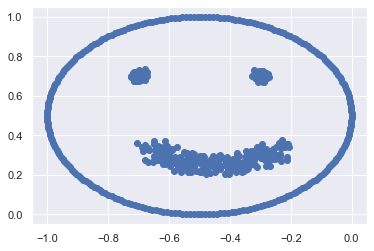

k = 2 , n_iter = 4 , runtime =  23.07 ms
k = 3 , n_iter = 5 , runtime =  34.52 ms
k = 4 , n_iter = 12 , runtime =  39.37 ms
k = 5 , n_iter = 6 , runtime =  52.82 ms
k = 6 , n_iter = 11 , runtime =  54.27 ms
k = 7 , n_iter = 13 , runtime =  62.92 ms
k = 8 , n_iter = 8 , runtime =  69.21 ms
k = 9 , n_iter = 17 , runtime =  83.56 ms
k = 10 , n_iter = 29 , runtime =  76.24 ms

smile2.arff


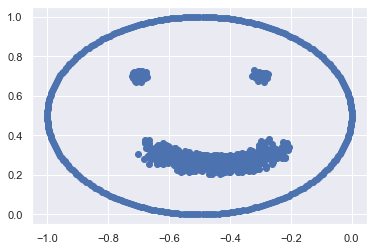

k = 2 , n_iter = 4 , runtime =  23.71 ms
k = 3 , n_iter = 5 , runtime =  36.98 ms
k = 4 , n_iter = 12 , runtime =  44.63 ms
k = 5 , n_iter = 6 , runtime =  60.3 ms
k = 6 , n_iter = 11 , runtime =  85.19 ms
k = 7 , n_iter = 13 , runtime =  55.34 ms
k = 8 , n_iter = 8 , runtime =  63.6 ms
k = 9 , n_iter = 17 , runtime =  75.28 ms
k = 10 , n_iter = 29 , runtime =  81.21 ms

smile3.arff


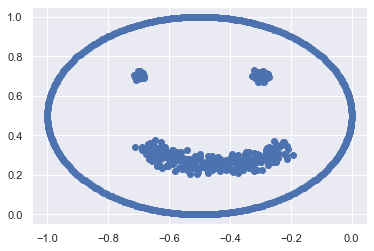

k = 2 , n_iter = 4 , runtime =  22.72 ms
k = 3 , n_iter = 5 , runtime =  31.73 ms
k = 4 , n_iter = 12 , runtime =  41.82 ms
k = 5 , n_iter = 6 , runtime =  59.31 ms
k = 6 , n_iter = 11 , runtime =  64.06 ms
k = 7 , n_iter = 13 , runtime =  61.5 ms
k = 8 , n_iter = 8 , runtime =  67.92 ms
k = 9 , n_iter = 17 , runtime =  93.22 ms
k = 10 , n_iter = 29 , runtime =  73.89 ms

spherical_4_3.arff


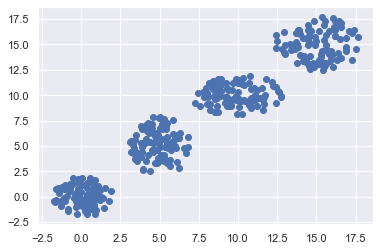

k = 2 , n_iter = 4 , runtime =  23.71 ms
k = 3 , n_iter = 5 , runtime =  34.87 ms
k = 4 , n_iter = 12 , runtime =  42.63 ms
k = 5 , n_iter = 6 , runtime =  51.2 ms
k = 6 , n_iter = 11 , runtime =  61.42 ms
k = 7 , n_iter = 13 , runtime =  63.15 ms
k = 8 , n_iter = 8 , runtime =  72.37 ms
k = 9 , n_iter = 17 , runtime =  69.2 ms
k = 10 , n_iter = 29 , runtime =  71.06 ms

spherical_5_2.arff


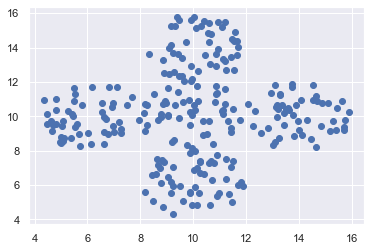

k = 2 , n_iter = 4 , runtime =  21.22 ms
k = 3 , n_iter = 5 , runtime =  33.69 ms
k = 4 , n_iter = 12 , runtime =  40.54 ms
k = 5 , n_iter = 6 , runtime =  57.43 ms
k = 6 , n_iter = 11 , runtime =  64.65 ms
k = 7 , n_iter = 13 , runtime =  66.21 ms
k = 8 , n_iter = 8 , runtime =  60.29 ms
k = 9 , n_iter = 17 , runtime =  69.42 ms
k = 10 , n_iter = 29 , runtime =  77.87 ms

spherical_6_2.arff


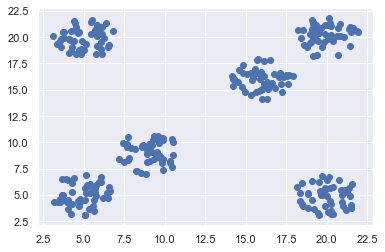

k = 2 , n_iter = 4 , runtime =  24.51 ms
k = 3 , n_iter = 5 , runtime =  37.0 ms
k = 4 , n_iter = 12 , runtime =  39.97 ms
k = 5 , n_iter = 6 , runtime =  52.55 ms
k = 6 , n_iter = 11 , runtime =  61.09 ms
k = 7 , n_iter = 13 , runtime =  69.16 ms
k = 8 , n_iter = 8 , runtime =  65.54 ms
k = 9 , n_iter = 17 , runtime =  71.87 ms
k = 10 , n_iter = 29 , runtime =  73.76 ms

spiral.arff


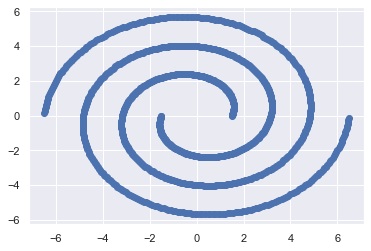

k = 2 , n_iter = 3 , runtime =  23.34 ms
k = 3 , n_iter = 5 , runtime =  35.53 ms
k = 4 , n_iter = 12 , runtime =  48.96 ms
k = 5 , n_iter = 6 , runtime =  55.21 ms
k = 6 , n_iter = 11 , runtime =  54.47 ms
k = 7 , n_iter = 13 , runtime =  56.6 ms
k = 8 , n_iter = 8 , runtime =  65.39 ms
k = 9 , n_iter = 17 , runtime =  75.55 ms
k = 10 , n_iter = 29 , runtime =  73.62 ms

spiralsquare.arff


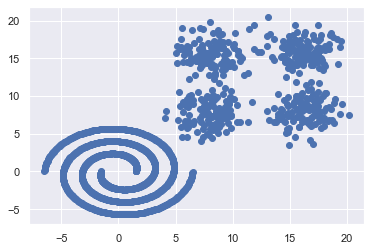

k = 2 , n_iter = 4 , runtime =  28.57 ms
k = 3 , n_iter = 5 , runtime =  38.36 ms
k = 4 , n_iter = 12 , runtime =  53.93 ms
k = 5 , n_iter = 6 , runtime =  56.45 ms
k = 6 , n_iter = 11 , runtime =  52.31 ms
k = 7 , n_iter = 13 , runtime =  60.36 ms
k = 8 , n_iter = 8 , runtime =  57.63 ms
k = 9 , n_iter = 17 , runtime =  71.99 ms
k = 10 , n_iter = 29 , runtime =  82.17 ms

square1.arff


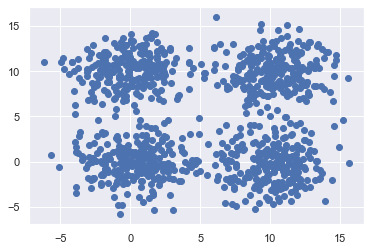

k = 2 , n_iter = 3 , runtime =  23.57 ms
k = 3 , n_iter = 5 , runtime =  33.57 ms
k = 4 , n_iter = 12 , runtime =  38.97 ms
k = 5 , n_iter = 6 , runtime =  50.54 ms
k = 6 , n_iter = 11 , runtime =  62.47 ms
k = 7 , n_iter = 13 , runtime =  71.76 ms
k = 8 , n_iter = 8 , runtime =  63.14 ms
k = 9 , n_iter = 17 , runtime =  71.65 ms
k = 10 , n_iter = 29 , runtime =  70.53 ms

square2.arff


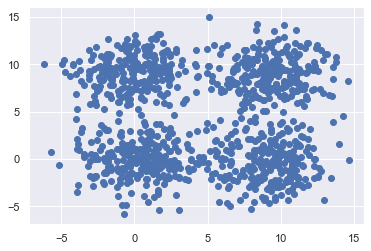

k = 2 , n_iter = 3 , runtime =  23.82 ms
k = 3 , n_iter = 5 , runtime =  37.17 ms
k = 4 , n_iter = 12 , runtime =  38.74 ms
k = 5 , n_iter = 6 , runtime =  51.62 ms
k = 6 , n_iter = 11 , runtime =  52.07 ms
k = 7 , n_iter = 13 , runtime =  55.69 ms
k = 8 , n_iter = 8 , runtime =  58.13 ms
k = 9 , n_iter = 17 , runtime =  82.24 ms
k = 10 , n_iter = 29 , runtime =  82.3 ms

square3.arff


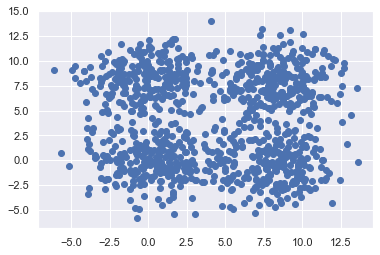

k = 2 , n_iter = 3 , runtime =  25.94 ms
k = 3 , n_iter = 5 , runtime =  38.43 ms
k = 4 , n_iter = 12 , runtime =  46.28 ms
k = 5 , n_iter = 6 , runtime =  55.66 ms
k = 6 , n_iter = 11 , runtime =  54.15 ms
k = 7 , n_iter = 13 , runtime =  60.4 ms
k = 8 , n_iter = 8 , runtime =  57.92 ms
k = 9 , n_iter = 17 , runtime =  65.56 ms
k = 10 , n_iter = 29 , runtime =  70.79 ms

square4.arff


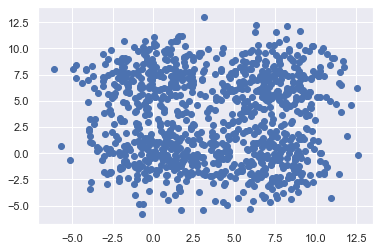

k = 2 , n_iter = 3 , runtime =  25.5 ms
k = 3 , n_iter = 5 , runtime =  33.42 ms
k = 4 , n_iter = 12 , runtime =  39.98 ms
k = 5 , n_iter = 6 , runtime =  51.42 ms
k = 6 , n_iter = 11 , runtime =  52.14 ms
k = 7 , n_iter = 13 , runtime =  55.49 ms
k = 8 , n_iter = 8 , runtime =  60.62 ms
k = 9 , n_iter = 17 , runtime =  64.93 ms
k = 10 , n_iter = 29 , runtime =  81.69 ms

square5.arff


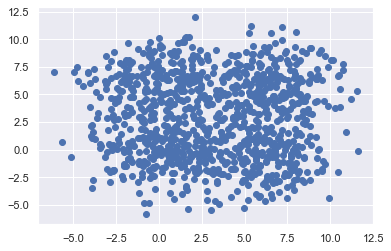

k = 2 , n_iter = 4 , runtime =  22.66 ms
k = 3 , n_iter = 5 , runtime =  32.3 ms
k = 4 , n_iter = 12 , runtime =  39.45 ms
k = 5 , n_iter = 6 , runtime =  51.02 ms
k = 6 , n_iter = 11 , runtime =  61.81 ms
k = 7 , n_iter = 13 , runtime =  65.67 ms
k = 8 , n_iter = 8 , runtime =  71.95 ms
k = 9 , n_iter = 17 , runtime =  73.91 ms
k = 10 , n_iter = 29 , runtime =  80.81 ms

st900.arff


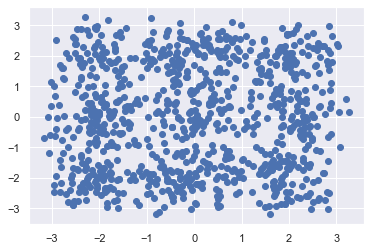

k = 2 , n_iter = 3 , runtime =  26.66 ms
k = 3 , n_iter = 5 , runtime =  39.45 ms
k = 4 , n_iter = 12 , runtime =  47.72 ms
k = 5 , n_iter = 6 , runtime =  57.88 ms
k = 6 , n_iter = 11 , runtime =  53.13 ms
k = 7 , n_iter = 13 , runtime =  57.09 ms
k = 8 , n_iter = 8 , runtime =  59.0 ms
k = 9 , n_iter = 17 , runtime =  64.96 ms
k = 10 , n_iter = 29 , runtime =  79.76 ms

target.arff


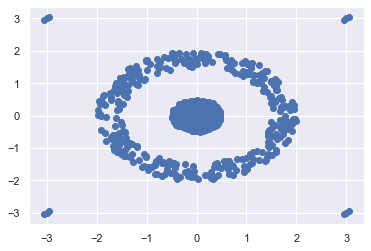

k = 2 , n_iter = 3 , runtime =  24.52 ms
k = 3 , n_iter = 5 , runtime =  34.97 ms
k = 4 , n_iter = 12 , runtime =  44.87 ms
k = 5 , n_iter = 6 , runtime =  53.68 ms
k = 6 , n_iter = 11 , runtime =  61.45 ms
k = 7 , n_iter = 13 , runtime =  62.53 ms
k = 8 , n_iter = 8 , runtime =  64.91 ms
k = 9 , n_iter = 17 , runtime =  73.92 ms
k = 10 , n_iter = 29 , runtime =  73.45 ms

tetra.arff


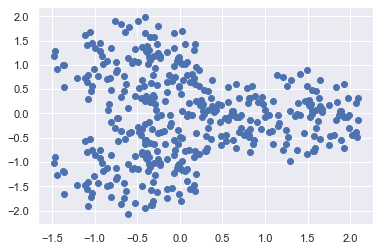

k = 2 , n_iter = 3 , runtime =  24.53 ms
k = 3 , n_iter = 5 , runtime =  33.03 ms
k = 4 , n_iter = 12 , runtime =  39.64 ms
k = 5 , n_iter = 6 , runtime =  55.99 ms
k = 6 , n_iter = 11 , runtime =  51.64 ms
k = 7 , n_iter = 13 , runtime =  56.03 ms
k = 8 , n_iter = 8 , runtime =  85.1 ms
k = 9 , n_iter = 17 , runtime =  73.41 ms
k = 10 , n_iter = 29 , runtime =  78.7 ms

threenorm.arff


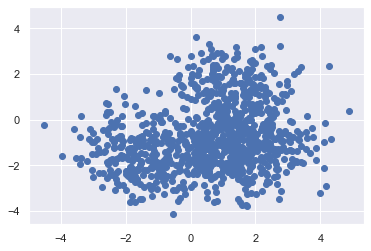

k = 2 , n_iter = 3 , runtime =  24.47 ms
k = 3 , n_iter = 5 , runtime =  35.06 ms
k = 4 , n_iter = 12 , runtime =  40.64 ms
k = 5 , n_iter = 6 , runtime =  52.72 ms
k = 6 , n_iter = 11 , runtime =  55.72 ms
k = 7 , n_iter = 13 , runtime =  59.02 ms
k = 8 , n_iter = 8 , runtime =  66.46 ms
k = 9 , n_iter = 17 , runtime =  75.76 ms
k = 10 , n_iter = 29 , runtime =  87.7 ms

triangle1.arff


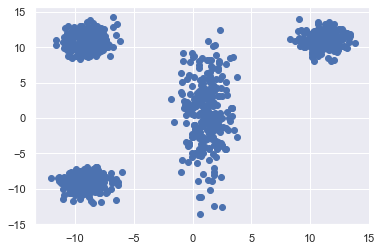

k = 2 , n_iter = 3 , runtime =  24.18 ms
k = 3 , n_iter = 5 , runtime =  38.11 ms
k = 4 , n_iter = 12 , runtime =  46.62 ms
k = 5 , n_iter = 6 , runtime =  60.26 ms
k = 6 , n_iter = 11 , runtime =  58.63 ms
k = 7 , n_iter = 13 , runtime =  73.2 ms
k = 8 , n_iter = 8 , runtime =  65.34 ms
k = 9 , n_iter = 17 , runtime =  75.16 ms
k = 10 , n_iter = 29 , runtime =  87.17 ms

triangle2.arff


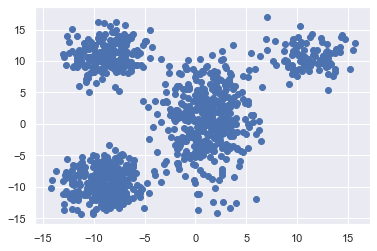

k = 2 , n_iter = 3 , runtime =  26.21 ms
k = 3 , n_iter = 5 , runtime =  36.68 ms
k = 4 , n_iter = 12 , runtime =  45.27 ms
k = 5 , n_iter = 6 , runtime =  57.06 ms
k = 6 , n_iter = 11 , runtime =  58.03 ms
k = 7 , n_iter = 13 , runtime =  70.4 ms
k = 8 , n_iter = 8 , runtime =  66.37 ms
k = 9 , n_iter = 17 , runtime =  72.87 ms
k = 10 , n_iter = 29 , runtime =  85.76 ms

twenty.arff


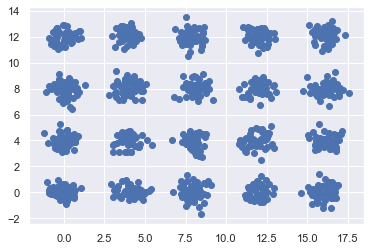

k = 2 , n_iter = 4 , runtime =  28.27 ms
k = 3 , n_iter = 5 , runtime =  41.23 ms
k = 4 , n_iter = 12 , runtime =  51.93 ms
k = 5 , n_iter = 6 , runtime =  61.22 ms
k = 6 , n_iter = 11 , runtime =  58.09 ms
k = 7 , n_iter = 13 , runtime =  67.08 ms
k = 8 , n_iter = 8 , runtime =  69.1 ms
k = 9 , n_iter = 17 , runtime =  75.58 ms
k = 10 , n_iter = 29 , runtime =  79.79 ms

twodiamonds.arff


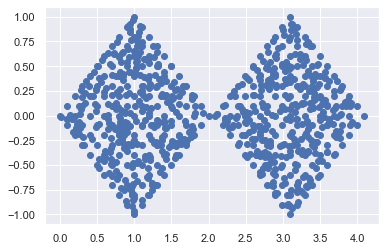

k = 2 , n_iter = 3 , runtime =  23.92 ms
k = 3 , n_iter = 5 , runtime =  39.62 ms
k = 4 , n_iter = 12 , runtime =  47.6 ms
k = 5 , n_iter = 6 , runtime =  58.53 ms
k = 6 , n_iter = 11 , runtime =  56.93 ms
k = 7 , n_iter = 13 , runtime =  60.53 ms
k = 8 , n_iter = 8 , runtime =  57.5 ms
k = 9 , n_iter = 17 , runtime =  71.03 ms
k = 10 , n_iter = 29 , runtime =  83.4 ms

wingnut.arff


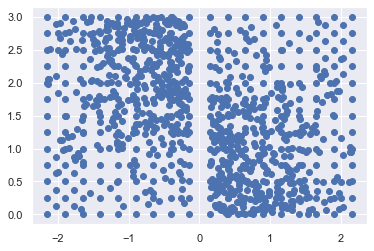

k = 2 , n_iter = 3 , runtime =  23.85 ms
k = 3 , n_iter = 5 , runtime =  37.07 ms
k = 4 , n_iter = 12 , runtime =  40.7 ms
k = 5 , n_iter = 6 , runtime =  52.09 ms
k = 6 , n_iter = 11 , runtime =  53.0 ms
k = 7 , n_iter = 13 , runtime =  57.22 ms
k = 8 , n_iter = 8 , runtime =  59.67 ms
k = 9 , n_iter = 17 , runtime =  66.9 ms
k = 10 , n_iter = 29 , runtime =  75.82 ms

xclara.arff


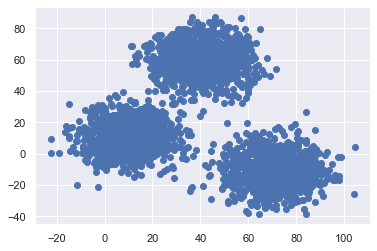

k = 2 , n_iter = 4 , runtime =  31.11 ms
k = 3 , n_iter = 5 , runtime =  33.78 ms
k = 4 , n_iter = 12 , runtime =  43.25 ms
k = 5 , n_iter = 6 , runtime =  52.52 ms
k = 6 , n_iter = 11 , runtime =  52.24 ms
k = 7 , n_iter = 13 , runtime =  59.87 ms
k = 8 , n_iter = 8 , runtime =  59.4 ms
k = 9 , n_iter = 17 , runtime =  80.6 ms
k = 10 , n_iter = 29 , runtime =  104.55 ms

xor.arff


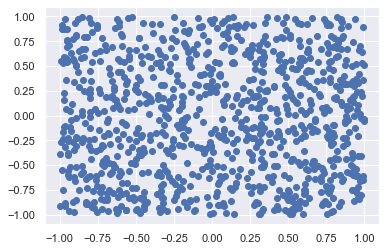

k = 2 , n_iter = 3 , runtime =  28.61 ms
k = 3 , n_iter = 5 , runtime =  53.28 ms
k = 4 , n_iter = 12 , runtime =  60.08 ms
k = 5 , n_iter = 6 , runtime =  63.62 ms
k = 6 , n_iter = 11 , runtime =  60.24 ms
k = 7 , n_iter = 13 , runtime =  63.57 ms
k = 8 , n_iter = 8 , runtime =  79.28 ms
k = 9 , n_iter = 17 , runtime =  70.98 ms
k = 10 , n_iter = 29 , runtime =  72.75 ms

zelnik1.arff


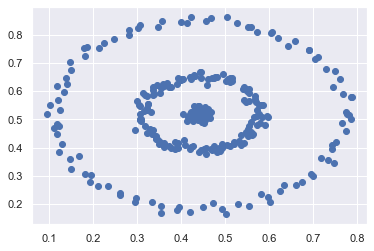

k = 2 , n_iter = 3 , runtime =  26.25 ms
k = 3 , n_iter = 5 , runtime =  45.46 ms
k = 4 , n_iter = 12 , runtime =  44.12 ms
k = 5 , n_iter = 6 , runtime =  56.47 ms
k = 6 , n_iter = 11 , runtime =  54.63 ms
k = 7 , n_iter = 13 , runtime =  59.0 ms
k = 8 , n_iter = 8 , runtime =  63.54 ms
k = 9 , n_iter = 17 , runtime =  76.49 ms
k = 10 , n_iter = 29 , runtime =  105.27 ms

zelnik2.arff


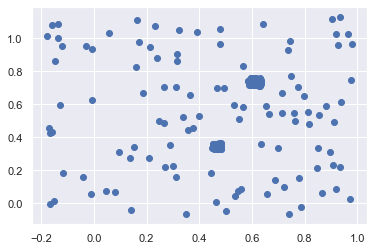

k = 2 , n_iter = 4 , runtime =  26.52 ms
k = 3 , n_iter = 5 , runtime =  31.95 ms
k = 4 , n_iter = 12 , runtime =  38.58 ms
k = 5 , n_iter = 6 , runtime =  50.48 ms
k = 6 , n_iter = 11 , runtime =  52.29 ms
k = 7 , n_iter = 13 , runtime =  58.86 ms
k = 8 , n_iter = 8 , runtime =  70.59 ms
k = 9 , n_iter = 17 , runtime =  72.31 ms
k = 10 , n_iter = 29 , runtime =  84.3 ms

zelnik3.arff


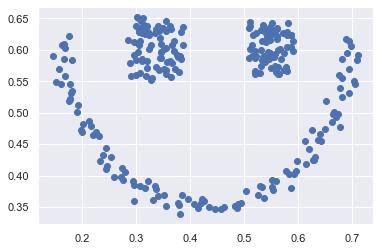

k = 2 , n_iter = 3 , runtime =  21.4 ms
k = 3 , n_iter = 5 , runtime =  34.18 ms
k = 4 , n_iter = 12 , runtime =  41.71 ms
k = 5 , n_iter = 6 , runtime =  54.93 ms
k = 6 , n_iter = 11 , runtime =  54.29 ms
k = 7 , n_iter = 13 , runtime =  66.81 ms
k = 8 , n_iter = 8 , runtime =  63.68 ms
k = 9 , n_iter = 17 , runtime =  68.41 ms
k = 10 , n_iter = 29 , runtime =  74.39 ms

zelnik4.arff


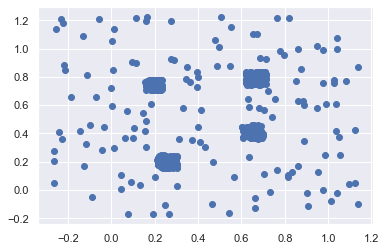

k = 2 , n_iter = 3 , runtime =  23.61 ms
k = 3 , n_iter = 5 , runtime =  31.9 ms
k = 4 , n_iter = 12 , runtime =  38.9 ms
k = 5 , n_iter = 6 , runtime =  52.99 ms
k = 6 , n_iter = 11 , runtime =  86.79 ms
k = 7 , n_iter = 13 , runtime =  60.8 ms
k = 8 , n_iter = 8 , runtime =  64.19 ms
k = 9 , n_iter = 17 , runtime =  74.9 ms
k = 10 , n_iter = 29 , runtime =  77.67 ms

zelnik5.arff


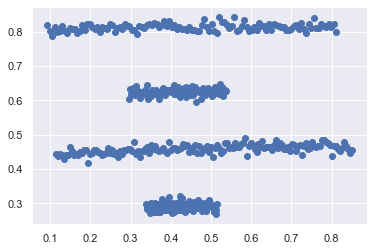

k = 2 , n_iter = 3 , runtime =  22.64 ms
k = 3 , n_iter = 5 , runtime =  33.35 ms
k = 4 , n_iter = 12 , runtime =  44.9 ms
k = 5 , n_iter = 6 , runtime =  51.11 ms
k = 6 , n_iter = 11 , runtime =  54.47 ms
k = 7 , n_iter = 13 , runtime =  59.03 ms
k = 8 , n_iter = 8 , runtime =  61.43 ms
k = 9 , n_iter = 17 , runtime =  67.53 ms
k = 10 , n_iter = 29 , runtime =  75.66 ms

zelnik6.arff


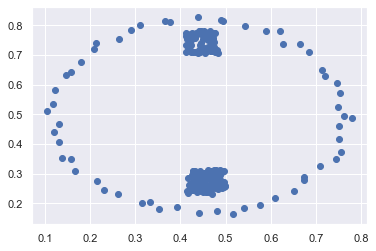

k = 2 , n_iter = 3 , runtime =  23.33 ms
k = 3 , n_iter = 5 , runtime =  34.83 ms
k = 4 , n_iter = 12 , runtime =  39.33 ms
k = 5 , n_iter = 6 , runtime =  51.68 ms
k = 6 , n_iter = 11 , runtime =  60.3 ms
k = 7 , n_iter = 13 , runtime =  62.54 ms
k = 8 , n_iter = 8 , runtime =  59.15 ms
k = 9 , n_iter = 17 , runtime =  68.2 ms
k = 10 , n_iter = 29 , runtime =  73.03 ms



In [8]:
for f in Files :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        plt.scatter(X,Y)
        plt.show()
        for k in range(2,11):
            tps1 = time.clock()
            i = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(data).n_iter_    
            tps2 = time.clock()
            print("k =",k,", n_iter =",i, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
        print()

## 3) Agglomerative Clustering

2d-10c.arff
k = 2 , runtime =  175.58 ms silh_score =  0.4319375426986309


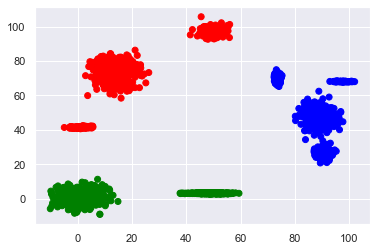

k = 3 , runtime =  193.49 ms silh_score =  0.6181693057982444
k = 4 , runtime =  176.1 ms silh_score =  0.680192656341491
k = 5 , runtime =  200.08 ms silh_score =  0.73347455779082
k = 6 , runtime =  179.27 ms silh_score =  0.6932256370018
k = 7 , runtime =  174.65 ms silh_score =  0.7375884416799317
k = 8 , runtime =  174.99 ms silh_score =  0.7569111339092157
k = 9 , runtime =  170.35 ms silh_score =  0.6856057085634313
k = 10 , runtime =  173.39 ms silh_score =  0.7088267388933748

2d-20c-no0.arff
k = 2 , runtime =  34.97 ms silh_score =  0.41574875015529406


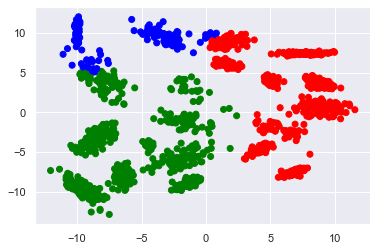

k = 3 , runtime =  36.47 ms silh_score =  0.4414390975686413
k = 4 , runtime =  39.77 ms silh_score =  0.4324233295067162
k = 5 , runtime =  35.15 ms silh_score =  0.4024261415681798
k = 6 , runtime =  35.21 ms silh_score =  0.3972035656713161
k = 7 , runtime =  37.79 ms silh_score =  0.4275697356509905
k = 8 , runtime =  35.73 ms silh_score =  0.47280126990099036
k = 9 , runtime =  37.13 ms silh_score =  0.4661305502107471
k = 10 , runtime =  38.28 ms silh_score =  0.4927579789155096

2d-3c-no123.arff
k = 2 , runtime =  9.41 ms silh_score =  0.572127416948334


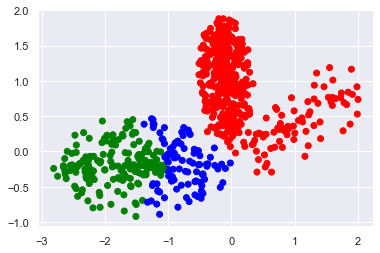

k = 3 , runtime =  9.33 ms silh_score =  0.42885619300211497
k = 4 , runtime =  11.01 ms silh_score =  0.48135159316118153
k = 5 , runtime =  10.77 ms silh_score =  0.4586676045542972
k = 6 , runtime =  9.87 ms silh_score =  0.41529235935974984
k = 7 , runtime =  8.93 ms silh_score =  0.3850673860766872
k = 8 , runtime =  11.86 ms silh_score =  0.3707285303177107
k = 9 , runtime =  9.1 ms silh_score =  0.37446247682454853
k = 10 , runtime =  9.61 ms silh_score =  0.3942611966381045

2d-4c-no4.arff
k = 2 , runtime =  13.81 ms silh_score =  0.6031512476524266


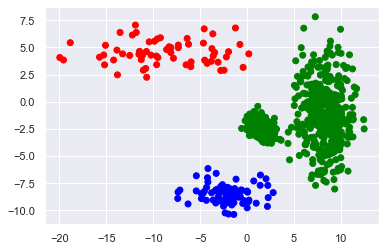

k = 3 , runtime =  12.35 ms silh_score =  0.5105228013344894
k = 4 , runtime =  17.6 ms silh_score =  0.49642104093932676
k = 5 , runtime =  14.51 ms silh_score =  0.3264388726957575
k = 6 , runtime =  15.22 ms silh_score =  0.5475769476173975
k = 7 , runtime =  13.56 ms silh_score =  0.5535831225181571
k = 8 , runtime =  13.0 ms silh_score =  0.535732240415105
k = 9 , runtime =  12.49 ms silh_score =  0.5109574602254289
k = 10 , runtime =  13.51 ms silh_score =  0.4893217442204792

2d-4c-no9.arff
k = 2 , runtime =  16.94 ms silh_score =  0.5402658208301628


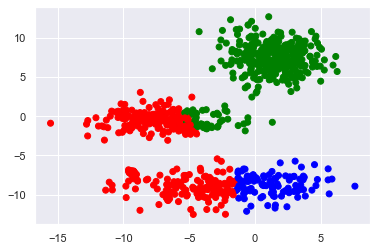

k = 3 , runtime =  13.72 ms silh_score =  0.46707031215657885
k = 4 , runtime =  18.43 ms silh_score =  0.5049060564958274
k = 5 , runtime =  13.86 ms silh_score =  0.4970748064719576
k = 6 , runtime =  13.58 ms silh_score =  0.35345360541259035
k = 7 , runtime =  13.71 ms silh_score =  0.3356497193820692
k = 8 , runtime =  13.38 ms silh_score =  0.36975193334026074
k = 9 , runtime =  13.39 ms silh_score =  0.3824037179967936
k = 10 , runtime =  13.97 ms silh_score =  0.3677499654081381

2d-4c.arff
k = 2 , runtime =  27.52 ms silh_score =  0.7232948842289767


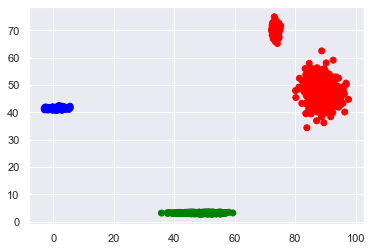

k = 3 , runtime =  25.08 ms silh_score =  0.8663200072095998
k = 4 , runtime =  25.8 ms silh_score =  0.8670311065845322
k = 5 , runtime =  23.94 ms silh_score =  0.6710321765035772
k = 6 , runtime =  24.29 ms silh_score =  0.5261128060242968
k = 7 , runtime =  25.25 ms silh_score =  0.4994643565448922
k = 8 , runtime =  27.64 ms silh_score =  0.5123582330078644
k = 9 , runtime =  25.15 ms silh_score =  0.5066276657748552
k = 10 , runtime =  24.54 ms silh_score =  0.4938613980384086

2dnormals.arff
k = 2 , runtime =  21.57 ms silh_score =  0.43025720333245915


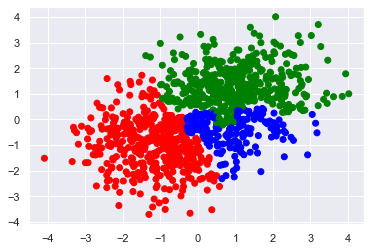

k = 3 , runtime =  19.91 ms silh_score =  0.297763956457174
k = 4 , runtime =  24.91 ms silh_score =  0.27327519889824653
k = 5 , runtime =  19.33 ms silh_score =  0.2628412870596168
k = 6 , runtime =  19.28 ms silh_score =  0.23964172359214606
k = 7 , runtime =  19.54 ms silh_score =  0.2178764479565588
k = 8 , runtime =  19.42 ms silh_score =  0.21245953788543762
k = 9 , runtime =  19.59 ms silh_score =  0.1895403953359053
k = 10 , runtime =  20.37 ms silh_score =  0.1850722124835892

2sp2glob.arff
k = 2 , runtime =  57.16 ms silh_score =  0.662270906036177


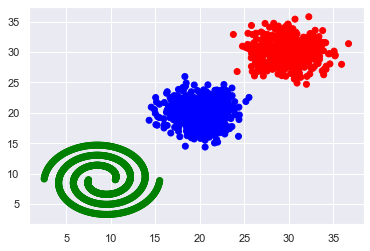

k = 3 , runtime =  64.9 ms silh_score =  0.6958375349228363
k = 4 , runtime =  59.89 ms silh_score =  0.5764926538986449
k = 5 , runtime =  57.85 ms silh_score =  0.3910947939362376
k = 6 , runtime =  55.46 ms silh_score =  0.2896197523495963
k = 7 , runtime =  56.81 ms silh_score =  0.2325709207247143
k = 8 , runtime =  58.76 ms silh_score =  0.2818544729935752
k = 9 , runtime =  57.66 ms silh_score =  0.2679143828042738
k = 10 , runtime =  58.52 ms silh_score =  0.261876362818493

3-spiral.arff
k = 2 , runtime =  2.81 ms silh_score =  0.2897696590489686


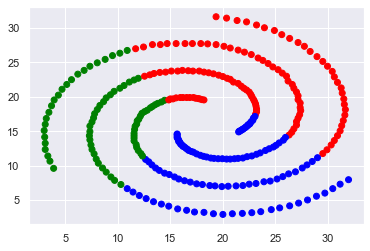

k = 3 , runtime =  2.24 ms silh_score =  0.34553575996045643
k = 4 , runtime =  2.67 ms silh_score =  0.32605392691889096
k = 5 , runtime =  2.69 ms silh_score =  0.28419427076021664
k = 6 , runtime =  3.11 ms silh_score =  0.27423389620586947
k = 7 , runtime =  3.49 ms silh_score =  0.24377015059973653
k = 8 , runtime =  2.12 ms silh_score =  0.278349988128254
k = 9 , runtime =  2.21 ms silh_score =  0.2782919585587638
k = 10 , runtime =  2.2 ms silh_score =  0.2723980271392749



In [9]:
colormap=np.array(['Red','green','blue'])
for f in Files[:10] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])

        for k in range(2,11):
            tps1 = time.clock()
            model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage="complete").fit(data) #linkage = single, average, complete, ward
            tps2 = time.clock()
            silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
            if k == 3:
                plt.scatter(X,Y, c=colormap[model.labels_])
                plt.show()
            print("k =",k,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
        print()

## 4) DBSCAN

In [ ]:
colormap=np.array(['Red','green','blue'])

for f in Files[:3] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        params = []
        silhs = []
        for ms in range(2,11):
            for eps_i in range(2,10):
                eps = eps_i/10
                tps1 = time.clock()
                model = DBSCAN(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
                tps2 = time.clock()
                print(model.labels_)
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                print("min-sample =",ms,"eps =",eps,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
                params.append((ms,eps))
                silhs.append(silh)
            print()
        print("meilleurs résultats pour le couple (min-sample, eps) = ",params[np.argmax(silhs)])    
        print()

## 5) HDBSCAN

In [ ]:
colormap=np.array(['Red','green','blue'])

for f in Files[:3] :
    if f not in ["3MC.arff","DS-577.arff","DS-850.arff"]:
        print(f)
        data_brutes = arff.loadarff(open(f,'r'))[0]    
        X,Y = [x[0] for x in data_brutes],[x[1] for x in data_brutes]
        data = np.array([(x[0],x[1]) for x in data_brutes])
        params = []
        silhs = []
        for ms in range(2,11):
            for eps_i in range(2,10):
                eps = eps_i/10
                tps1 = time.clock()
                model = HDBSCAN(eps=eps,min_samples=ms, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(data)
                tps2 = time.clock()
                silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
                print("min-sample =",ms,"eps =",eps,", runtime = ", round((tps2 - tps1)*1000,2),"ms","silh_score = ",silh)
                params.append((ms,eps))
                silhs.append(silh)
            print()
        print("meilleurs résultats pour le couple (min-sample, eps) = ",params[np.argmax(silhs)])    
        print()